# **Nigerian Covid-19 Data Analysis**

## Task 1 - Data Collection

### A- NCDC Website Scraping

**Importing Libraries**

In [1]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
import io
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from bs4 import BeautifulSoup as bs
sns.set_style("darkgrid")
%matplotlib inline
plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [2]:
url = "https://covid19.ncdc.gov.ng/"
page= requests.get(url)
page

<Response [200]>

In [3]:
covid_page = bs(page.content, "html.parser")
# Locating the table
covid_table=  covid_page.find("table")
# Locating all the rows in the table
rows = covid_table.find_all("tr")
# Getting the data in the table
for row in rows[1:]:
    cells = row.find_all("td")
    cell_text = [cell.get_text(strip=True) for cell in cells]
# Converting the data obtained to a csv file:
writer= csv.writer
with open("Confirmed covid cases by state.csv", "w", encoding = "utf8", newline = "") as f:
    the_writer = writer(f)
# Writing the table header
    header = ["States Affected", "No. of cases (Lab confirmed)", "No. of cases (on admission)",
              "No. Discharged", "No. of Deaths"]
    the_writer.writerow(header)
    for row in rows[0:]:
        cells = row.find_all("td")
        cell_text = [cell.get_text(strip=True) for cell in cells]
# Writing the rows of the table
        the_writer.writerow(cell_text)

In [4]:
df1= pd.read_csv("Confirmed covid cases by state.csv")

### B- Johns Hopkins Data Repository

In [5]:
url_1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
download1 = requests.get(url_1).content
df2 = pd.read_csv(io.StringIO(download1.decode("utf-8")))

In [6]:
url_2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
download2 = requests.get(url_2).content
df3 = pd.read_csv(io.StringIO(download2.decode("utf-8")))

In [7]:
url_3 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
download3 = requests.get(url_3).content
df4 = pd.read_csv(io.StringIO(download3.decode("utf-8")))

### C- External Data

In [8]:
df5 = pd.read_csv("covid_external.csv")

In [9]:
df6 = pd.read_csv("Budget data.csv")

In [10]:
df7 = pd.read_csv("RealGDP.csv")

## Task 2 - Viewing the Data

### Viewing the NCDC Data:

In [11]:
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of cases (Lab confirmed)  37 non-null     object
 2   No. of cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB
None


States Affected No. of cases (Lab confirmed) No. of cases (on admission)  \
0           Lagos                      104,286                       1,143   
1             FCT                       29,535                           9   
2          Rivers                       18,112                          -3   
3          Kaduna                       11,675                           3   
4         Plateau                       10,365                           4   

  No. Discharged  No. of Deaths  
0        102,372            771  
1         29,277            249  
2         17,960            155  
3         11,583             89  
4         10,286             75

### Viewing the Johns Hopkins Data:

In [12]:
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB
None


Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  
2  271469  271477  271477  271490  271494  271496  
3   47875   47875   47875   47875   47890   47890  
4  105277  105277  105277  105277  105288  105288  

[5 rows x 1147 columns]

In [13]:
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB
None


Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...        0       0       0       0   
1        0        0        0        0  ...        0       0       0       0   
2        0        0        0        0  ...        0       0       0       0   
3        0        0        0        0  ...        0       0       0       0   
4        0        0        0        0  ...        0       0       0       0   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0       0       0       0       0       0       0  
1       0       0       0       0       0       0  
2       0       0       0       0       0       0  
3       0       0       0       0       0       0  
4       0       0       0       0       0       0  

[5 rows x 1147 columns]

In [74]:
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1146 entries, Country/Region to 3/9/23
dtypes: float64(2), int64(1143), object(1)
memory usage: 2.5+ MB
None


Country/Region       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.93911  67.709953        0        0        0        0   
1        Albania  41.15330  20.168300        0        0        0        0   
2        Algeria  28.03390   1.659600        0        0        0        0   
3        Andorra  42.50630   1.521800        0        0        0        0   
4         Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
0        0        0        0  ...     7896    7896    7896    7896    7896   
1        0        0        0  ...     3598    3598    3598    3598    3598   
2        0        0        0  ...     6881    6881    6881    6881    6881   
3        0        0        0  ...      165     165     165     165     165   
4        0        0        0  ...     1933    1933    1933    1933    1933   

   3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896    7896  
1    3598    3598    3598    3598    3598  
2    6881    6881    6881    6881    6881  
3     165     165     165     165     165  
4    1933    1933    1933    1933    1933  

[5 rows x 1146 columns]

### Viewing the External Data:

In [14]:
print(df5.info())
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB
None


states         region  Population  Overall CCVI Index  Age  \
0        FCT  North Central     4865000                 0.3  0.0   
1    Plateau  North Central     4766000                 0.4  0.5   
2      Kwara  North Central     3524000                 0.3  0.4   
3  Nassarawa  North Central     2783000                 0.1  0.3   
4      Niger  North Central     6260000                 0.6  0.0   

   Epidemiological  Fragility  Health System  Population Density  \
0              0.9        0.4            0.6                 0.9   
1              0.4        0.8            0.3                 0.3   
2              0.3        0.2            0.4                 0.2   
3              0.5        0.9            0.0                 0.1   
4              0.6        0.3            0.7                 0.1   

   Socio-Economic   Transport Availability  Acute IHR  
0             0.6                      0.2       0.79  
1             0.5                      0.3       0.93  
2             0.6                      0.7       0.93  
3             0.6                      0.5       0.85  
4             0.8                      0.8       0.84

In [15]:
print(df6.info())
df6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1020.0+ bytes
None


states  Initial_budget (Bn)  Revised_budget (Bn)
0       Abia               136.60               102.70
1    Adamawa               183.30               139.31
2  Akwa-Ibom               597.73               366.00
3    Anambra               137.10               112.80
4     Bauchi               167.20               128.00

In [16]:
print(df7.info())
df7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 412.0 bytes
None


Year           Q1           Q2           Q3           Q4
0  2014  15438679.50  16084622.31  17479127.58  18150356.45
1  2015  16050601.38  16463341.91  17976234.59  18533752.07
2  2016  15943714.54  16218542.41  17555441.69  18213537.29
3  2017  15797965.83  16334719.27  17760228.17  18598067.07
4  2018  16096654.19  16580508.07  18081342.10  19041437.59

## Task 3 - Data Cleaning and Preparation

### Cleaning df1

In [17]:
# Removing white space characters from the "No. of cases (Lab confirmed)" and "No. Discharged" columns
df1["No. of cases (Lab confirmed)"] = df1["No. of cases (Lab confirmed)"].str.strip()
df1["No. Discharged"] = df1["No. Discharged"].str.strip()
# Removing "," charracters and converting the data type to integer
df1["No. of cases (Lab confirmed)"] = df1["No. of cases (Lab confirmed)"].str.replace(",","")
df1["No. Discharged"] = df1["No. Discharged"].str.replace(",","")
df1["No. of cases (Lab confirmed)"] = df1["No. of cases (Lab confirmed)"].astype("int")
df1["No. Discharged"] = df1["No. Discharged"].astype("int")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of cases (Lab confirmed)  37 non-null     int32 
 2   No. of cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 1.3+ KB


States Affected  No. of cases (Lab confirmed) No. of cases (on admission)  \
0           Lagos                        104286                       1,143   
1             FCT                         29535                           9   
2          Rivers                         18112                          -3   
3          Kaduna                         11675                           3   
4         Plateau                         10365                           4   

   No. Discharged  No. of Deaths  
0          102372            771  
1           29277            249  
2           17960            155  
3           11583             89  
4           10286             75

### Extracting Data for Nigeria from df2, df3 and df4

In [18]:
# Finding the label for Nigeria in the "Country/Region" column on df2:
df2["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

#### df2 (Confirmed Cases)

In [19]:
df2.drop("Province/State", axis=1, inplace=True)
Nig_confirmed = df2[df2["Country/Region"] == "Nigeria"]
print(Nig_confirmed)
Nig_confirmed.drop(["Country/Region", "Lat","Long"], axis=1, inplace=True)
Nig_confirmed = Nig_confirmed.melt(var_name= "Date", value_name = "Cases")
Nig_confirmed

    Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  \
206        Nigeria  9.082  8.6753        0        0        0        0   

     1/26/20  1/27/20  1/28/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
206        0        0        0  ...   266593  266598  266598  266598  266598   

     3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
206  266598  266598  266598  266598  266598  

[1 rows x 1146 columns]


Date   Cases
0     1/22/20       0
1     1/23/20       0
2     1/24/20       0
3     1/25/20       0
4     1/26/20       0
...       ...     ...
1138   3/5/23  266598
1139   3/6/23  266598
1140   3/7/23  266598
1141   3/8/23  266598
1142   3/9/23  266598

[1143 rows x 2 columns]

#### df3 (Recovered Cases)

In [20]:
df3.drop("Province/State", axis=1, inplace=True)
Nig_recovered = df3[df3["Country/Region"] == "Nigeria"]
print(Nig_recovered)
Nig_recovered.drop(["Country/Region", "Lat","Long"], axis=1, inplace=True)
Nig_recovered = Nig_recovered.melt(var_name= "Date", value_name = "Cases")
Nig_recovered

    Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  \
191        Nigeria  9.082  8.6753        0        0        0        0   

     1/26/20  1/27/20  1/28/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
191        0        0        0  ...        0       0       0       0       0   

     3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
191       0       0       0       0       0  

[1 rows x 1146 columns]


Date  Cases
0     1/22/20      0
1     1/23/20      0
2     1/24/20      0
3     1/25/20      0
4     1/26/20      0
...       ...    ...
1138   3/5/23      0
1139   3/6/23      0
1140   3/7/23      0
1141   3/8/23      0
1142   3/9/23      0

[1143 rows x 2 columns]

#### df4 (Death Cases)

In [21]:
df4.drop("Province/State", axis=1, inplace=True)
Nig_death = df4[df4["Country/Region"] == "Nigeria"]
print(Nig_death)
Nig_death.drop(["Country/Region", "Lat","Long"], axis=1, inplace=True)
Nig_death = Nig_death.melt(var_name= "Date", value_name = "Cases")
Nig_death

    Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  \
206        Nigeria  9.082  8.6753        0        0        0        0   

     1/26/20  1/27/20  1/28/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
206        0        0        0  ...     3155    3155    3155    3155    3155   

     3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
206    3155    3155    3155    3155    3155  

[1 rows x 1146 columns]


Date  Cases
0     1/22/20      0
1     1/23/20      0
2     1/24/20      0
3     1/25/20      0
4     1/26/20      0
...       ...    ...
1138   3/5/23   3155
1139   3/6/23   3155
1140   3/7/23   3155
1141   3/8/23   3155
1142   3/9/23   3155

[1143 rows x 2 columns]

### Merging the Datasets for Confirmed, Recovered, and Death Cases

In [22]:
Nig_confirmed.rename(columns={"Cases":"Confirmed_cases"}, inplace=True)
Nig_recovered.rename(columns={"Cases":"Recovered_cases"}, inplace=True)
Nig_death.rename(columns={"Cases":"Death_cases"}, inplace=True)

In [23]:
Nig_cases = Nig_confirmed.merge(Nig_recovered, on="Date").merge(Nig_death, on="Date")
Nig_cases.set_index("Date", drop=True, inplace=True)

In [24]:
Nig_cases.head()

Confirmed_cases  Recovered_cases  Death_cases
Date                                                  
1/22/20                0                0            0
1/23/20                0                0            0
1/24/20                0                0            0
1/25/20                0                0            0
1/26/20                0                0            0

## Task 4- Analysis

### Todo A - Top Ten States of Confirmed Covid Cases by Laboratory Tests

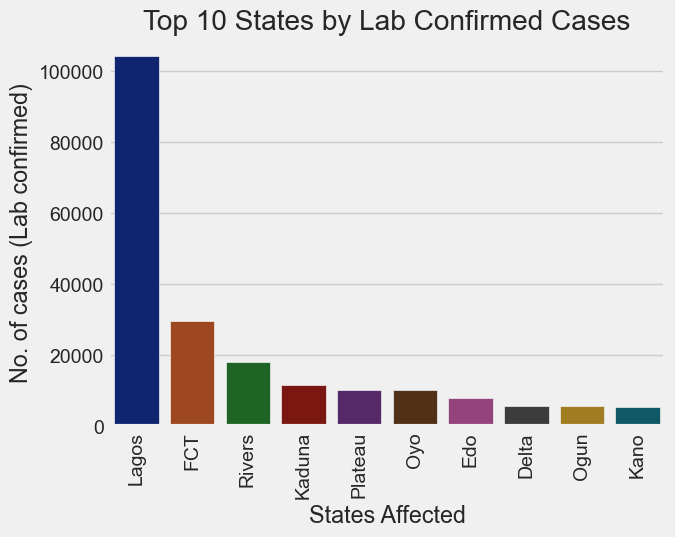

In [67]:
top_confirmed = df1.nlargest(n=10, columns=["No. of cases (Lab confirmed)"])
sns.barplot(x="States Affected", y="No. of cases (Lab confirmed)",data= top_confirmed)
plt.xticks(rotation=90)
plt.title("Top 10 States by Lab Confirmed Cases")
plt.show()

### Todo B - Top 10 States by Discharged Covid Cases

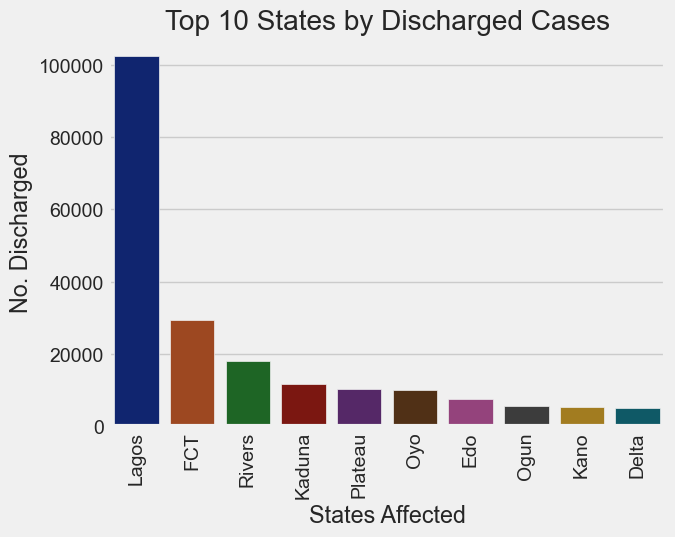

In [68]:
sns.set_palette("dark")
top_discharged = df1.nlargest(n=10, columns=["No. Discharged"])
sns.barplot(x="States Affected", y="No. Discharged",data= top_discharged)
plt.xticks(rotation=90)
plt.title("Top 10 States by Discharged Cases")
plt.show()

### Todo D - Top 10 States by Number of Covid Deaths

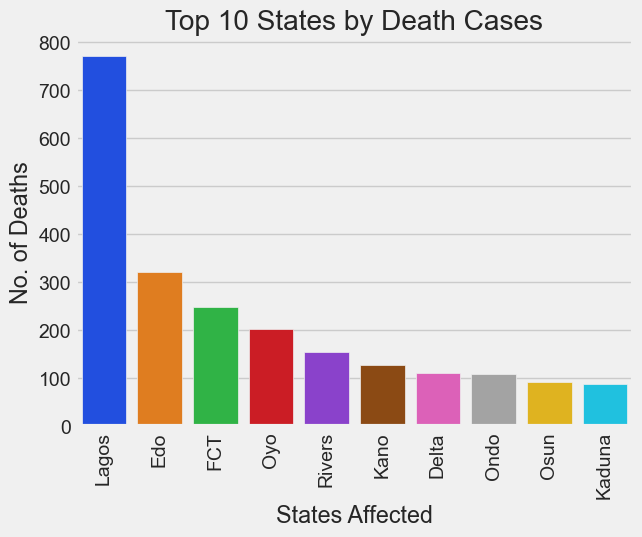

In [69]:
sns.set_palette("bright")
top_dead = df1.nlargest(n=10, columns=["No. of Deaths"])
sns.barplot(x="States Affected", y="No. of Deaths",data= top_dead)
plt.xticks(rotation=90)
plt.title("Top 10 States by Death Cases")
plt.show()

### Todo E - Plot of Total Daily Confirmed, Recovered and Death Cases

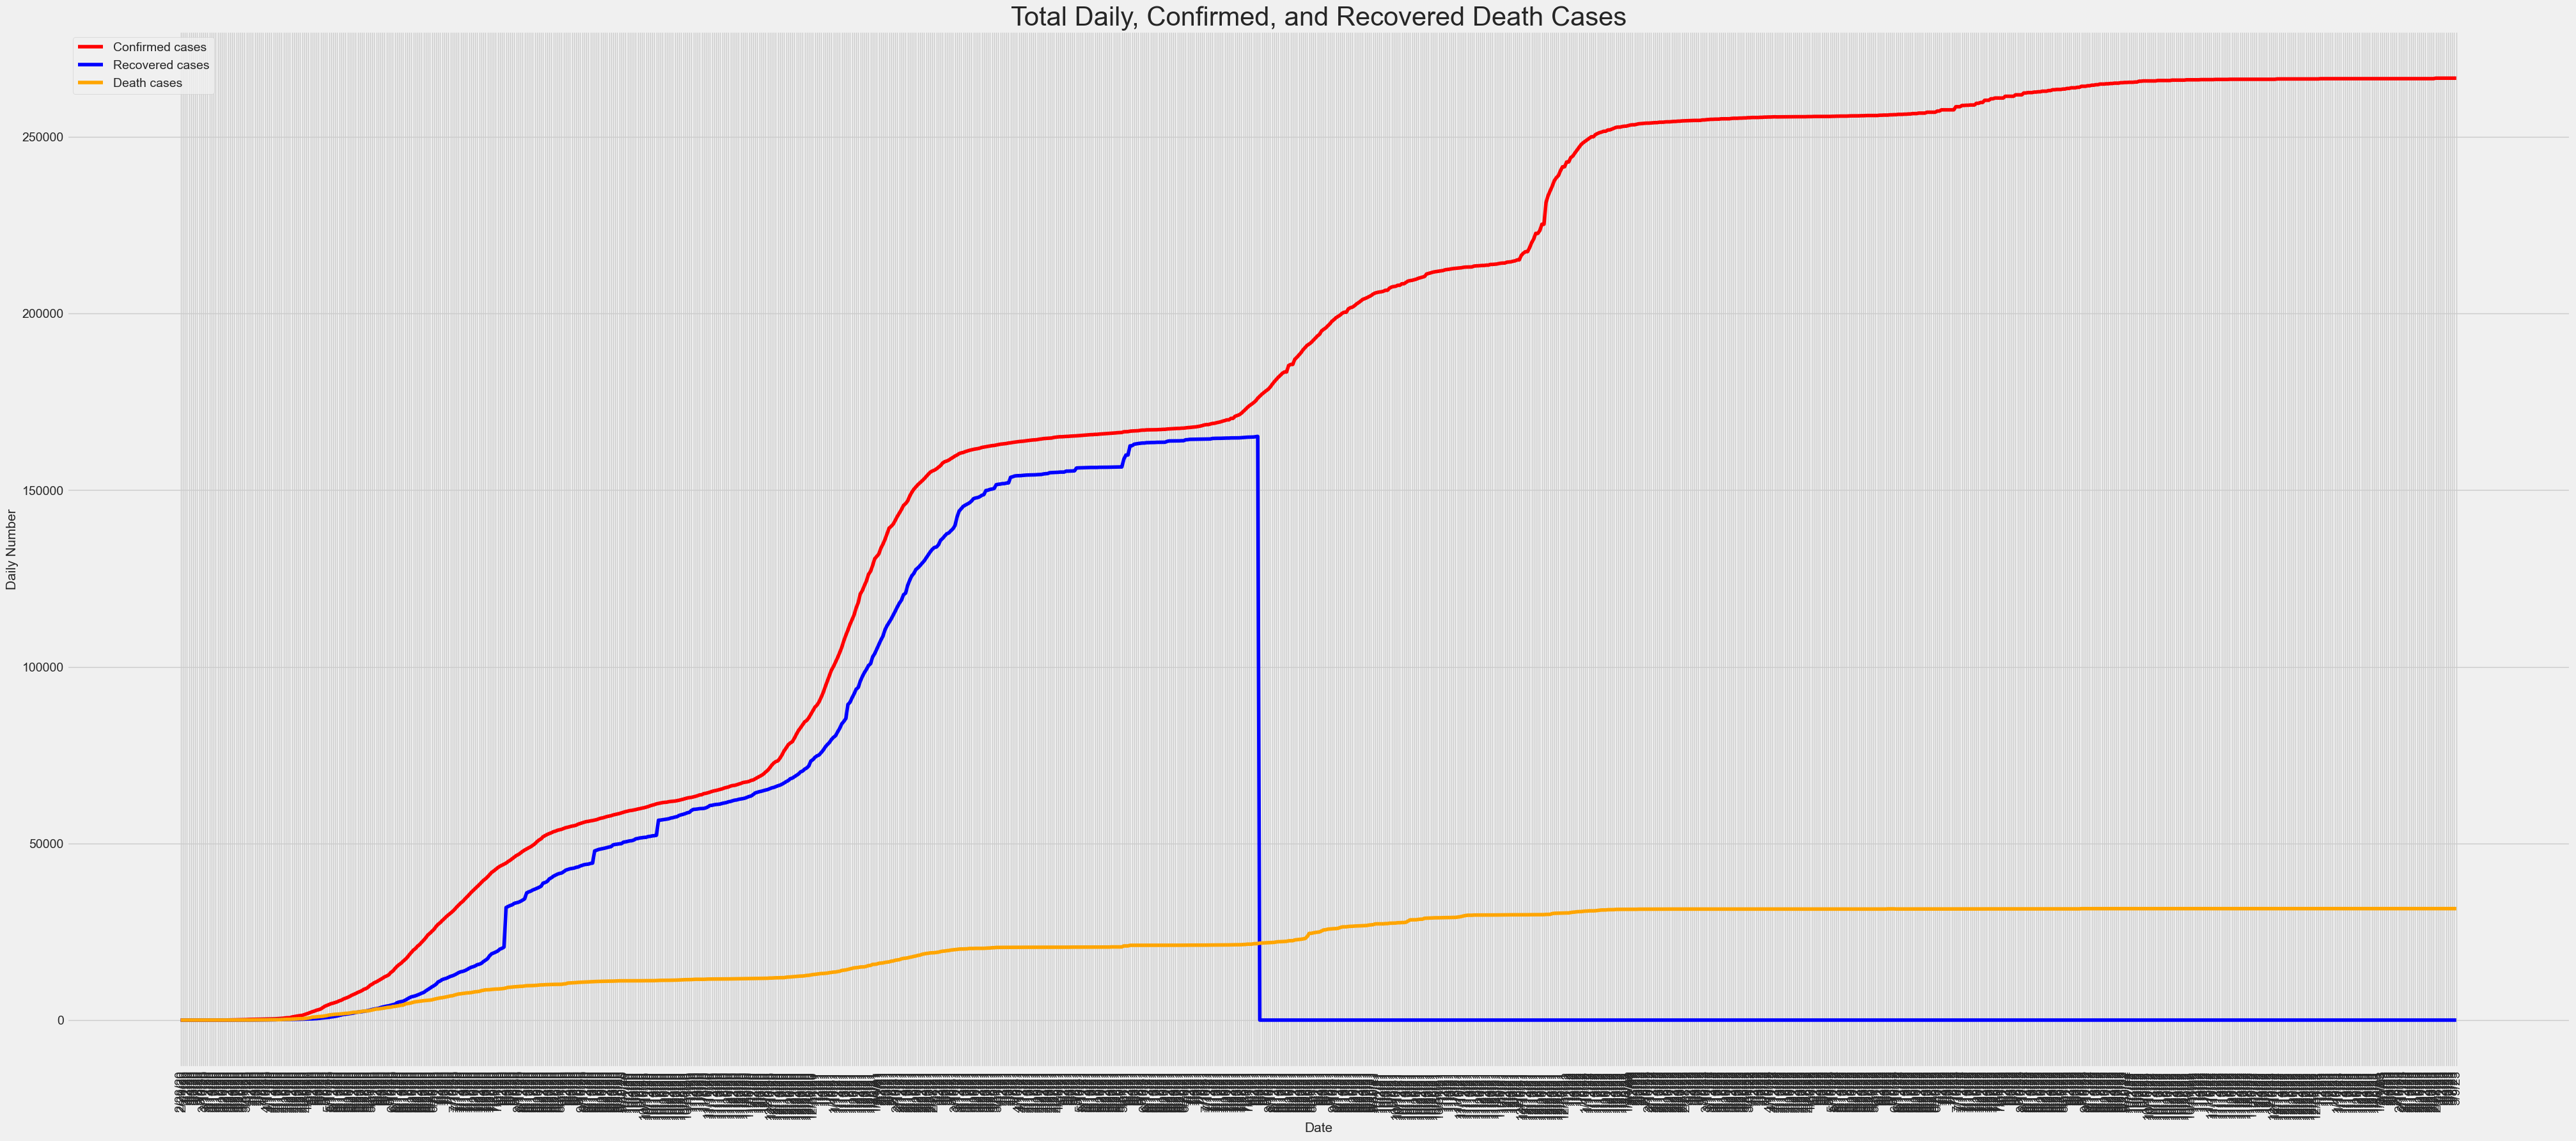

In [82]:
plt.figure(figsize=(45,20))
a = Nig_cases.index
b = Nig_cases["Confirmed_cases"]
c = Nig_cases["Recovered_cases"] 
d = Nig_cases["Death_cases"]

plt.plot(a, b,color="red", label="Confirmed cases") 
plt.plot(a, c,color="blue", label="Recovered cases")
plt.plot(a, d*10,color="orange", label="Death cases")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Daily Number", fontsize=15)
plt.xticks(rotation=90)
plt.title("Total Daily, Confirmed, and Recovered Death Cases", fontsize=30)
plt.legend(fontsize="medium")
plt.show()

### Todo F - Daily Infection Rate

### Adding a Column to Nig_cases with the Number of Daily Infections:

In [29]:
Nig_cases["Daily_infection"] = Nig_cases["Confirmed_cases"].diff(periods=1)
Nig_cases.head()

Confirmed_cases  Recovered_cases  Death_cases  Daily_infection
Date                                                                   
1/22/20                0                0            0              NaN
1/23/20                0                0            0              0.0
1/24/20                0                0            0              0.0
1/25/20                0                0            0              0.0
1/26/20                0                0            0              0.0

### Dropping All Rows with Null Values or All Zero Values

In [30]:
Nig_cases = Nig_cases.drop("1/22/20")
Nig_cases["Daily_infection"] = Nig_cases["Daily_infection"].astype(int)
Nig_cases = Nig_cases.loc[~(Nig_cases==0).all(axis=1)]

In [31]:
Nig_cases.head()

Confirmed_cases  Recovered_cases  Death_cases  Daily_infection
Date                                                                   
2/28/20                1                0            0                1
2/29/20                1                0            0                0
3/1/20                 1                0            0                0
3/2/20                 1                0            0                0
3/3/20                 1                0            0                0

### Plot of the Daily Number of Infections

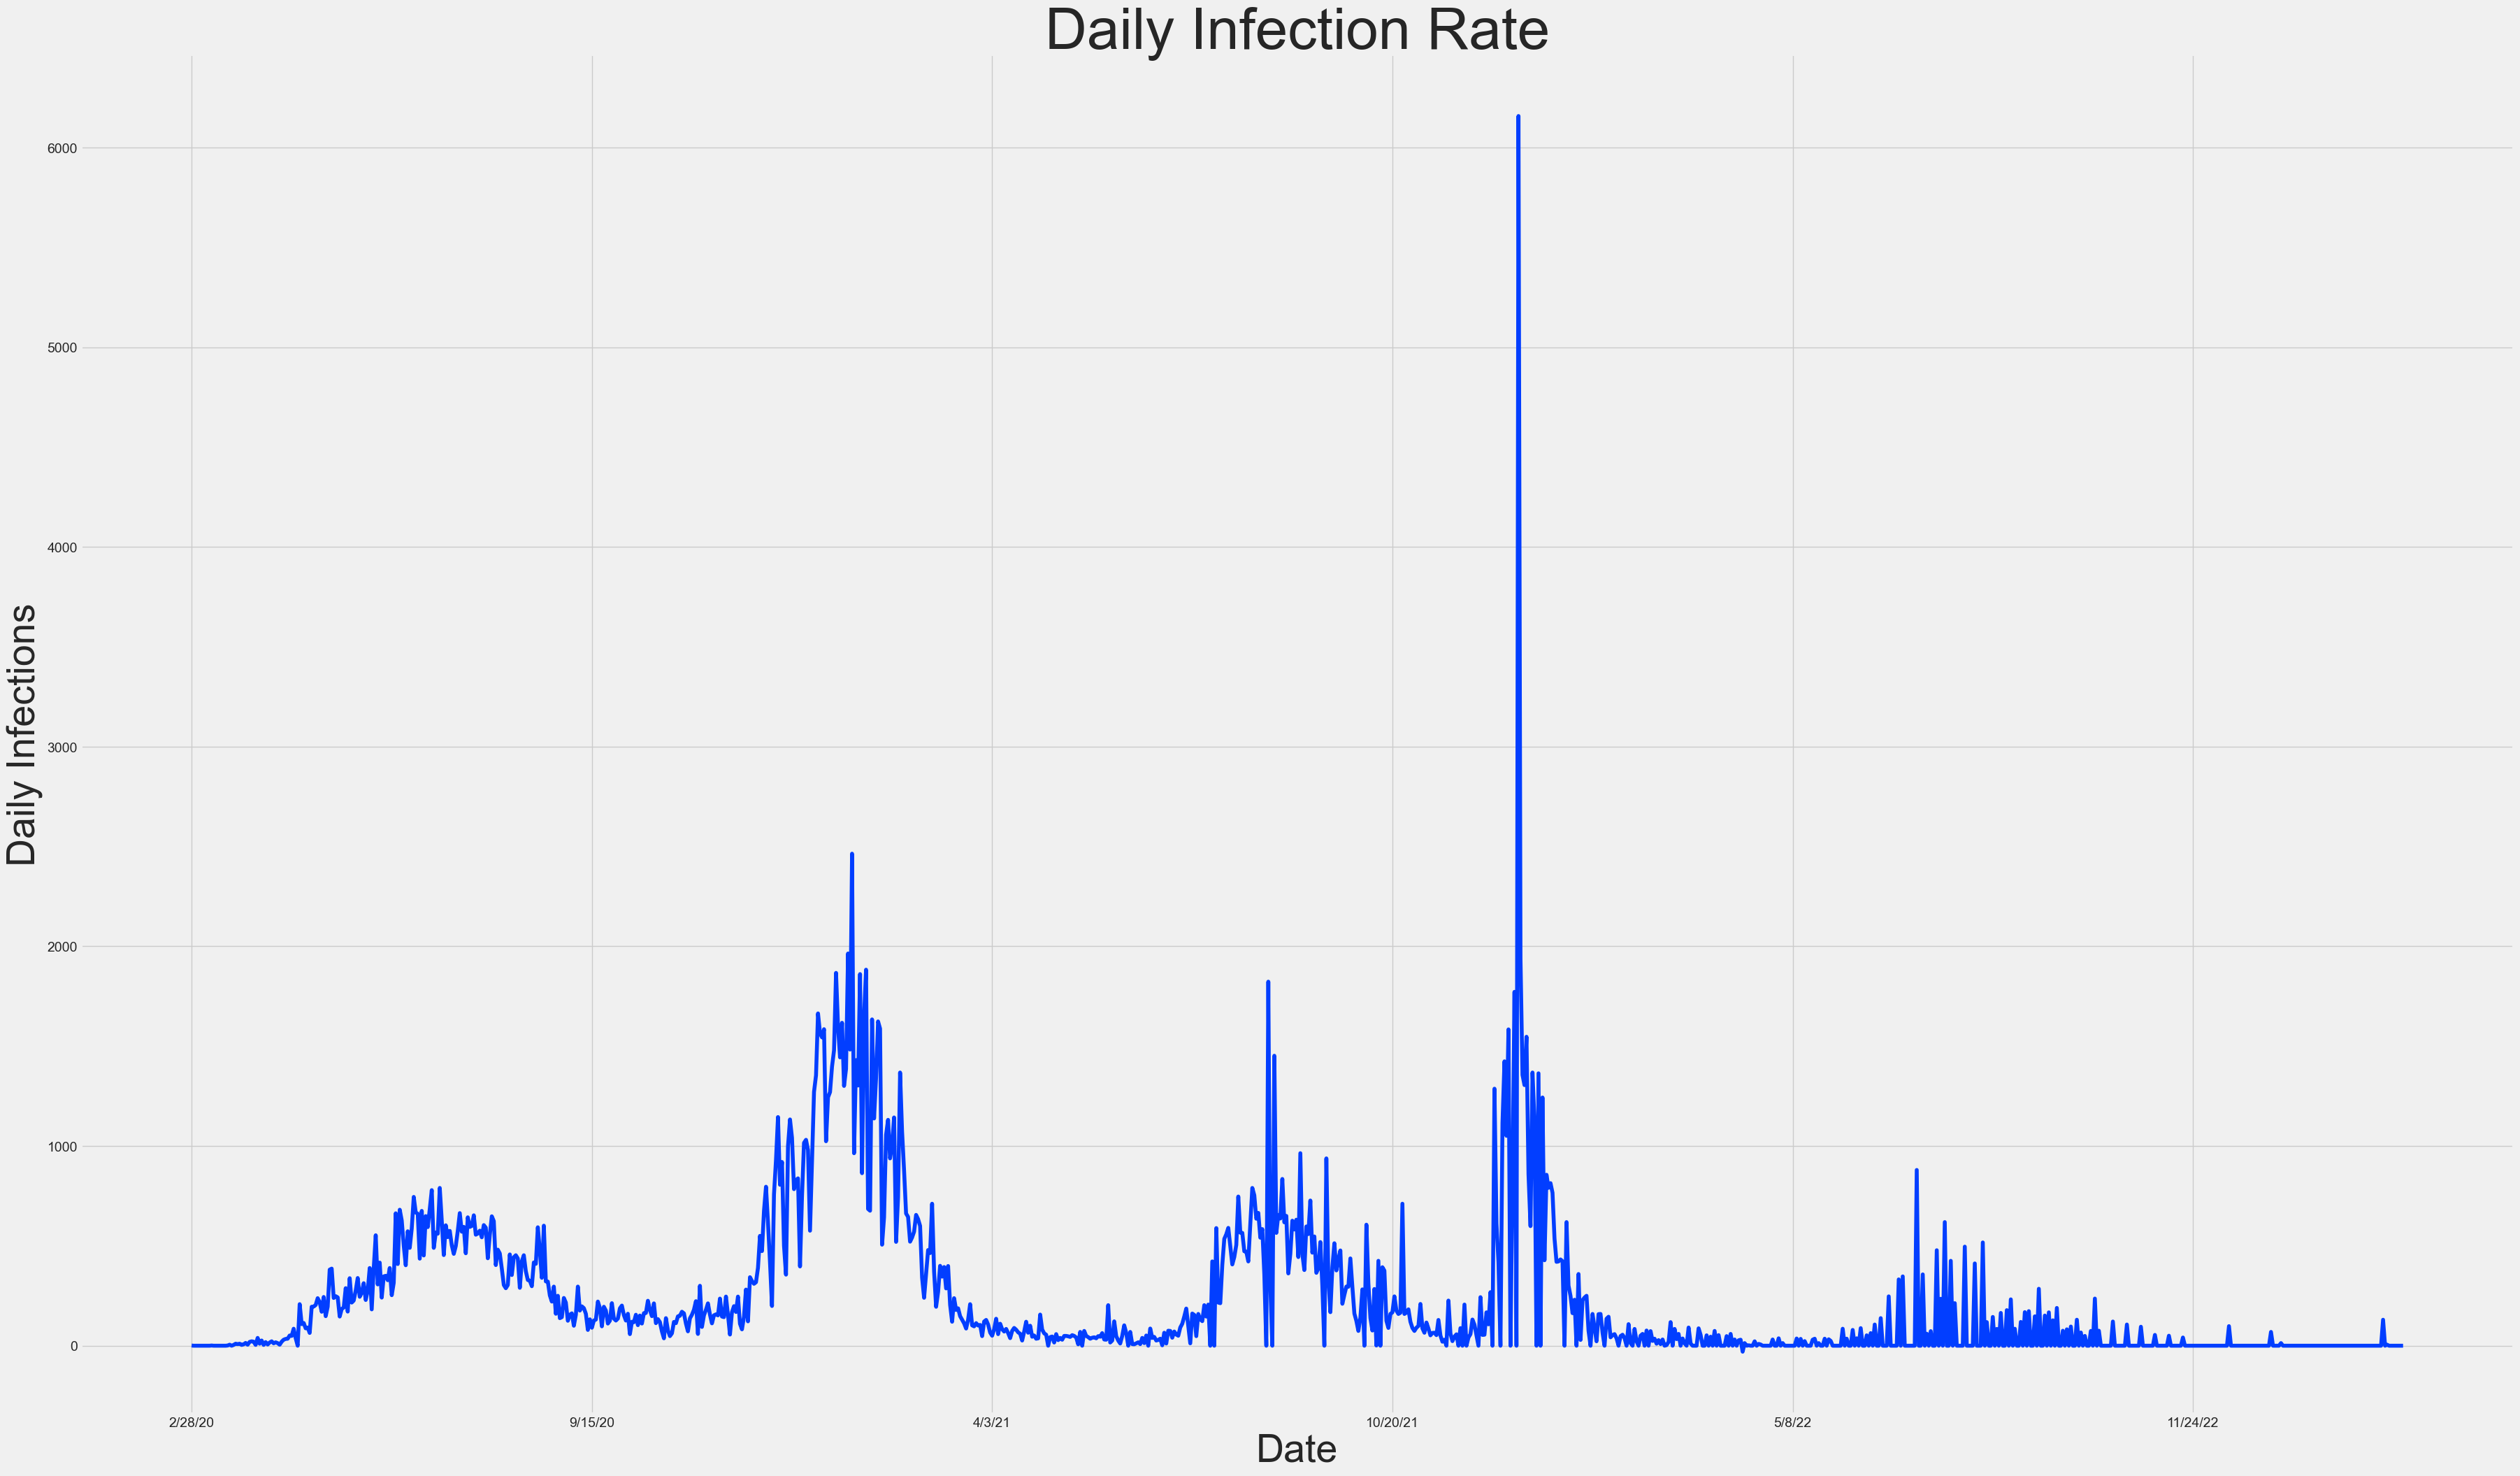

In [32]:
plt.figure(figsize=(40,24))
Nig_cases["Daily_infection"].plot()
plt.xlabel("Date", fontsize=40)
plt.ylabel("Daily Infections", fontsize=40)
plt.title("Daily Infection Rate", fontsize=60)
plt.show()

### Todo G - Finding the Date with the Maximum number of Infections

In [33]:
# max_index = Nig_cases["Daily_infection"].idxmax()
maximum_infections = Nig_cases.loc[Nig_cases["Daily_infection"].idxmax()]
print(maximum_infections)

Confirmed_cases    231413
Recovered_cases         0
Death_cases          2991
Daily_infection      6158
Name: 12/22/21, dtype: int64


#### The maximum number of infections occured on the 22nd of December, 2021

### Todo H - Plot of NCDC Covid-19 Dataset (df1) and External Dataset (df5)

#### Merging df1 and df5 

In [34]:
Nig_states = df1.merge(df5, left_on="States Affected", right_on="states", how="left")
Nig_states.drop("states", inplace=True, axis=1)
Nig_states.head()

States Affected  No. of cases (Lab confirmed) No. of cases (on admission)  \
0           Lagos                        104286                       1,143   
1             FCT                         29535                           9   
2          Rivers                         18112                          -3   
3          Kaduna                         11675                           3   
4         Plateau                         10365                           4   

   No. Discharged  No. of Deaths         region  Population  \
0          102372            771     South West  13992000.0   
1           29277            249  North Central   4865000.0   
2           17960            155    South South   7763000.0   
3           11583             89     North West   9227000.0   
4           10286             75  North Central   4766000.0   

   Overall CCVI Index  Age  Epidemiological  Fragility  Health System  \
0                 0.0  0.1              1.0        0.3            0.1   
1                 0.3  0.0              0.9        0.4            0.6   
2                 0.4  0.5              0.9        0.6            0.6   
3                 0.7  0.1              0.9        0.8            0.9   
4                 0.4  0.5              0.4        0.8            0.3   

   Population Density  Socio-Economic   Transport Availability  Acute IHR  
0                 1.0             0.1                      0.4       0.93  
1                 0.9             0.6                      0.2       0.79  
2                 0.9             0.1                      0.1       1.00  
3                 0.4             0.6                      0.4       0.86  
4                 0.3             0.5                      0.3       0.93

In [35]:
Top_10_states = Nig_states.nlargest(10, "No. of cases (Lab confirmed)")
Top_10_states.head()

States Affected  No. of cases (Lab confirmed) No. of cases (on admission)  \
0           Lagos                        104286                       1,143   
1             FCT                         29535                           9   
2          Rivers                         18112                          -3   
3          Kaduna                         11675                           3   
4         Plateau                         10365                           4   

   No. Discharged  No. of Deaths         region  Population  \
0          102372            771     South West  13992000.0   
1           29277            249  North Central   4865000.0   
2           17960            155    South South   7763000.0   
3           11583             89     North West   9227000.0   
4           10286             75  North Central   4766000.0   

   Overall CCVI Index  Age  Epidemiological  Fragility  Health System  \
0                 0.0  0.1              1.0        0.3            0.1   
1                 0.3  0.0              0.9        0.4            0.6   
2                 0.4  0.5              0.9        0.6            0.6   
3                 0.7  0.1              0.9        0.8            0.9   
4                 0.4  0.5              0.4        0.8            0.3   

   Population Density  Socio-Economic   Transport Availability  Acute IHR  
0                 1.0             0.1                      0.4       0.93  
1                 0.9             0.6                      0.2       0.79  
2                 0.9             0.1                      0.1       1.00  
3                 0.4             0.6                      0.4       0.86  
4                 0.3             0.5                      0.3       0.93

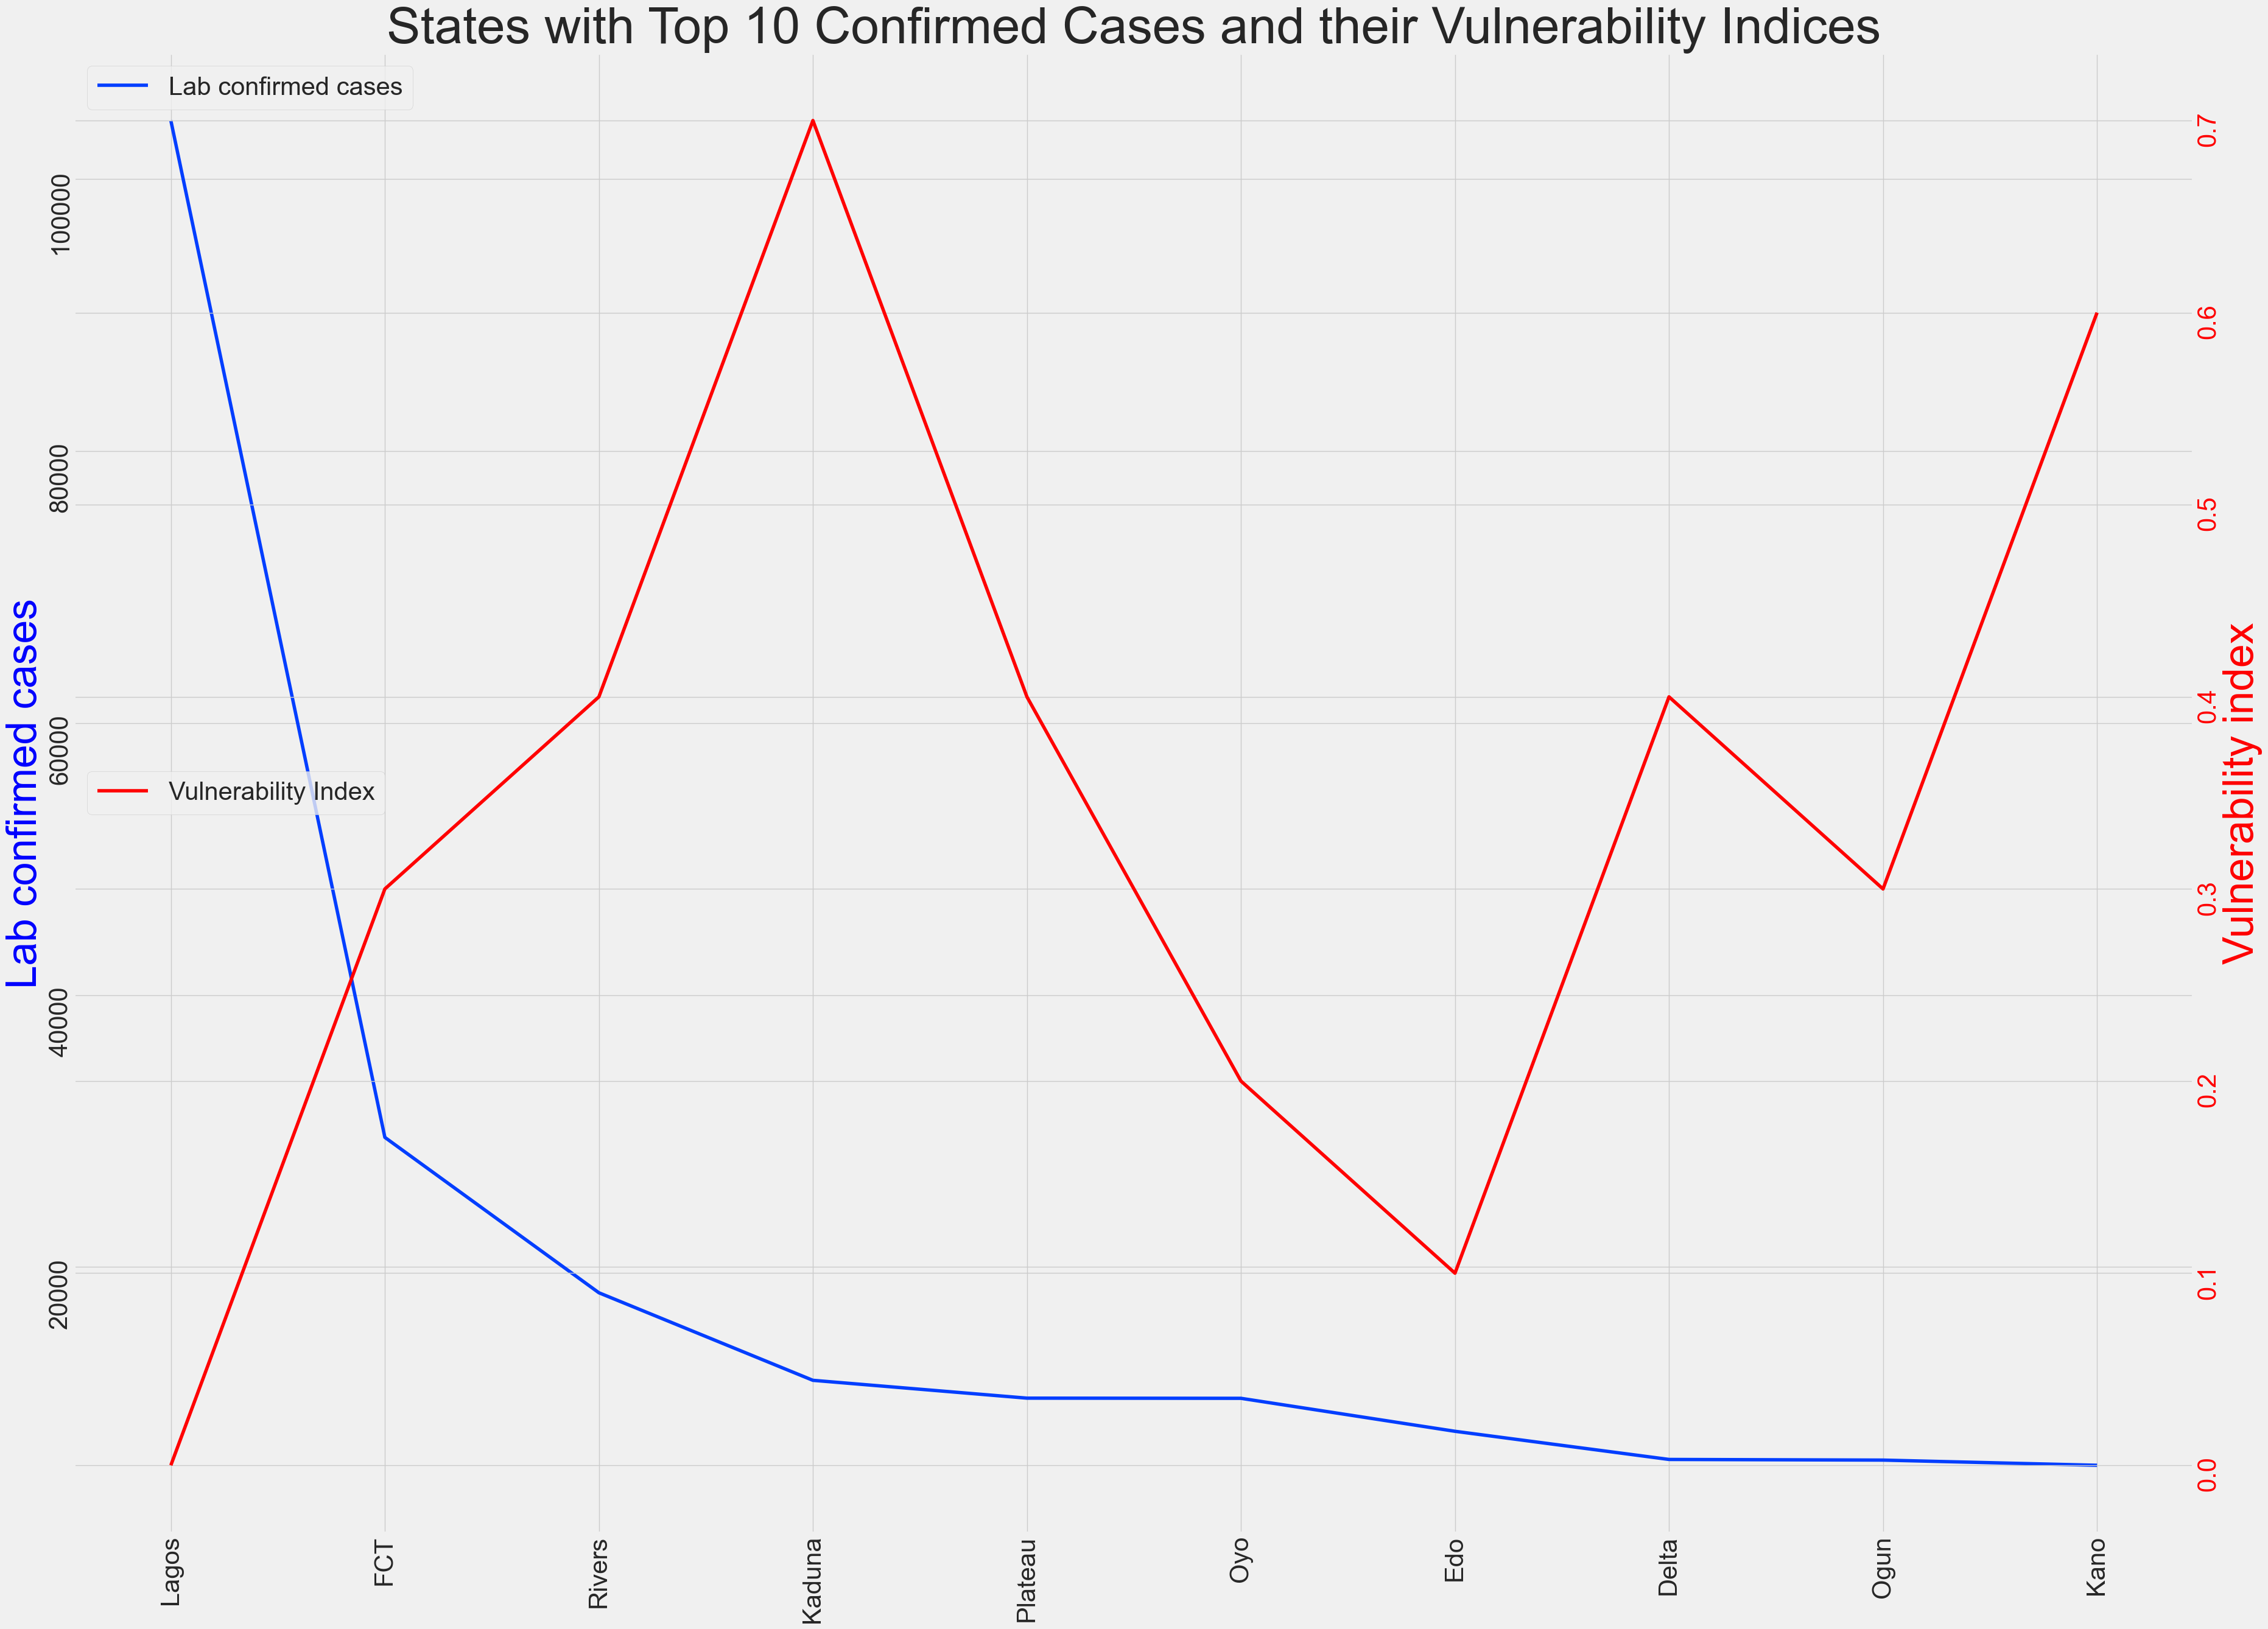

In [37]:
x = Top_10_states["States Affected"]
y = Top_10_states["No. of cases (Lab confirmed)"]
z = Top_10_states["Overall CCVI Index"]
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, label="Lab confirmed cases")
ax1.set_ylabel('Lab confirmed cases',color= "b", fontsize=50)
ax2 = ax1.twinx()
ax2.plot(x, z, 'r-', label="Vulnerability Index")
ax2.set_ylabel('Vulnerability index', color='r',fontsize=50)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.legend(loc=2, prop={'size': 30})
ax2.legend(loc=6, prop={'size': 30})
ax1.tick_params(axis='x', labelrotation = 90, labelsize=30)
ax1.tick_params(axis='y', labelrotation = 90, labelsize=30)
ax2.tick_params(axis='y', labelrotation = 90, labelsize=30)
plt.title("States with Top 10 Confirmed Cases and their Vulnerability Indices", fontsize=60)
plt.show()

#### Observation
##### In the context of Covid-19, the vulnerability index is the measure of exposure of a population to the negative impacts of the pandemic. It accounts for various factors that may make a population more susceptible to the virus. Such factors include healthcare access, socioeconomic status, and population density.<br>One would expect to find a relationship between the vulnerability index and the number of lab confirmed cases (more vulnerable locations will be expected to report more cases). <br>However, this is not the case, as evident from the above plot of Lab confirmed cases against vulnerability index for various states.

### Todo I - Regression Plot of Confirmed Cases and Population Density

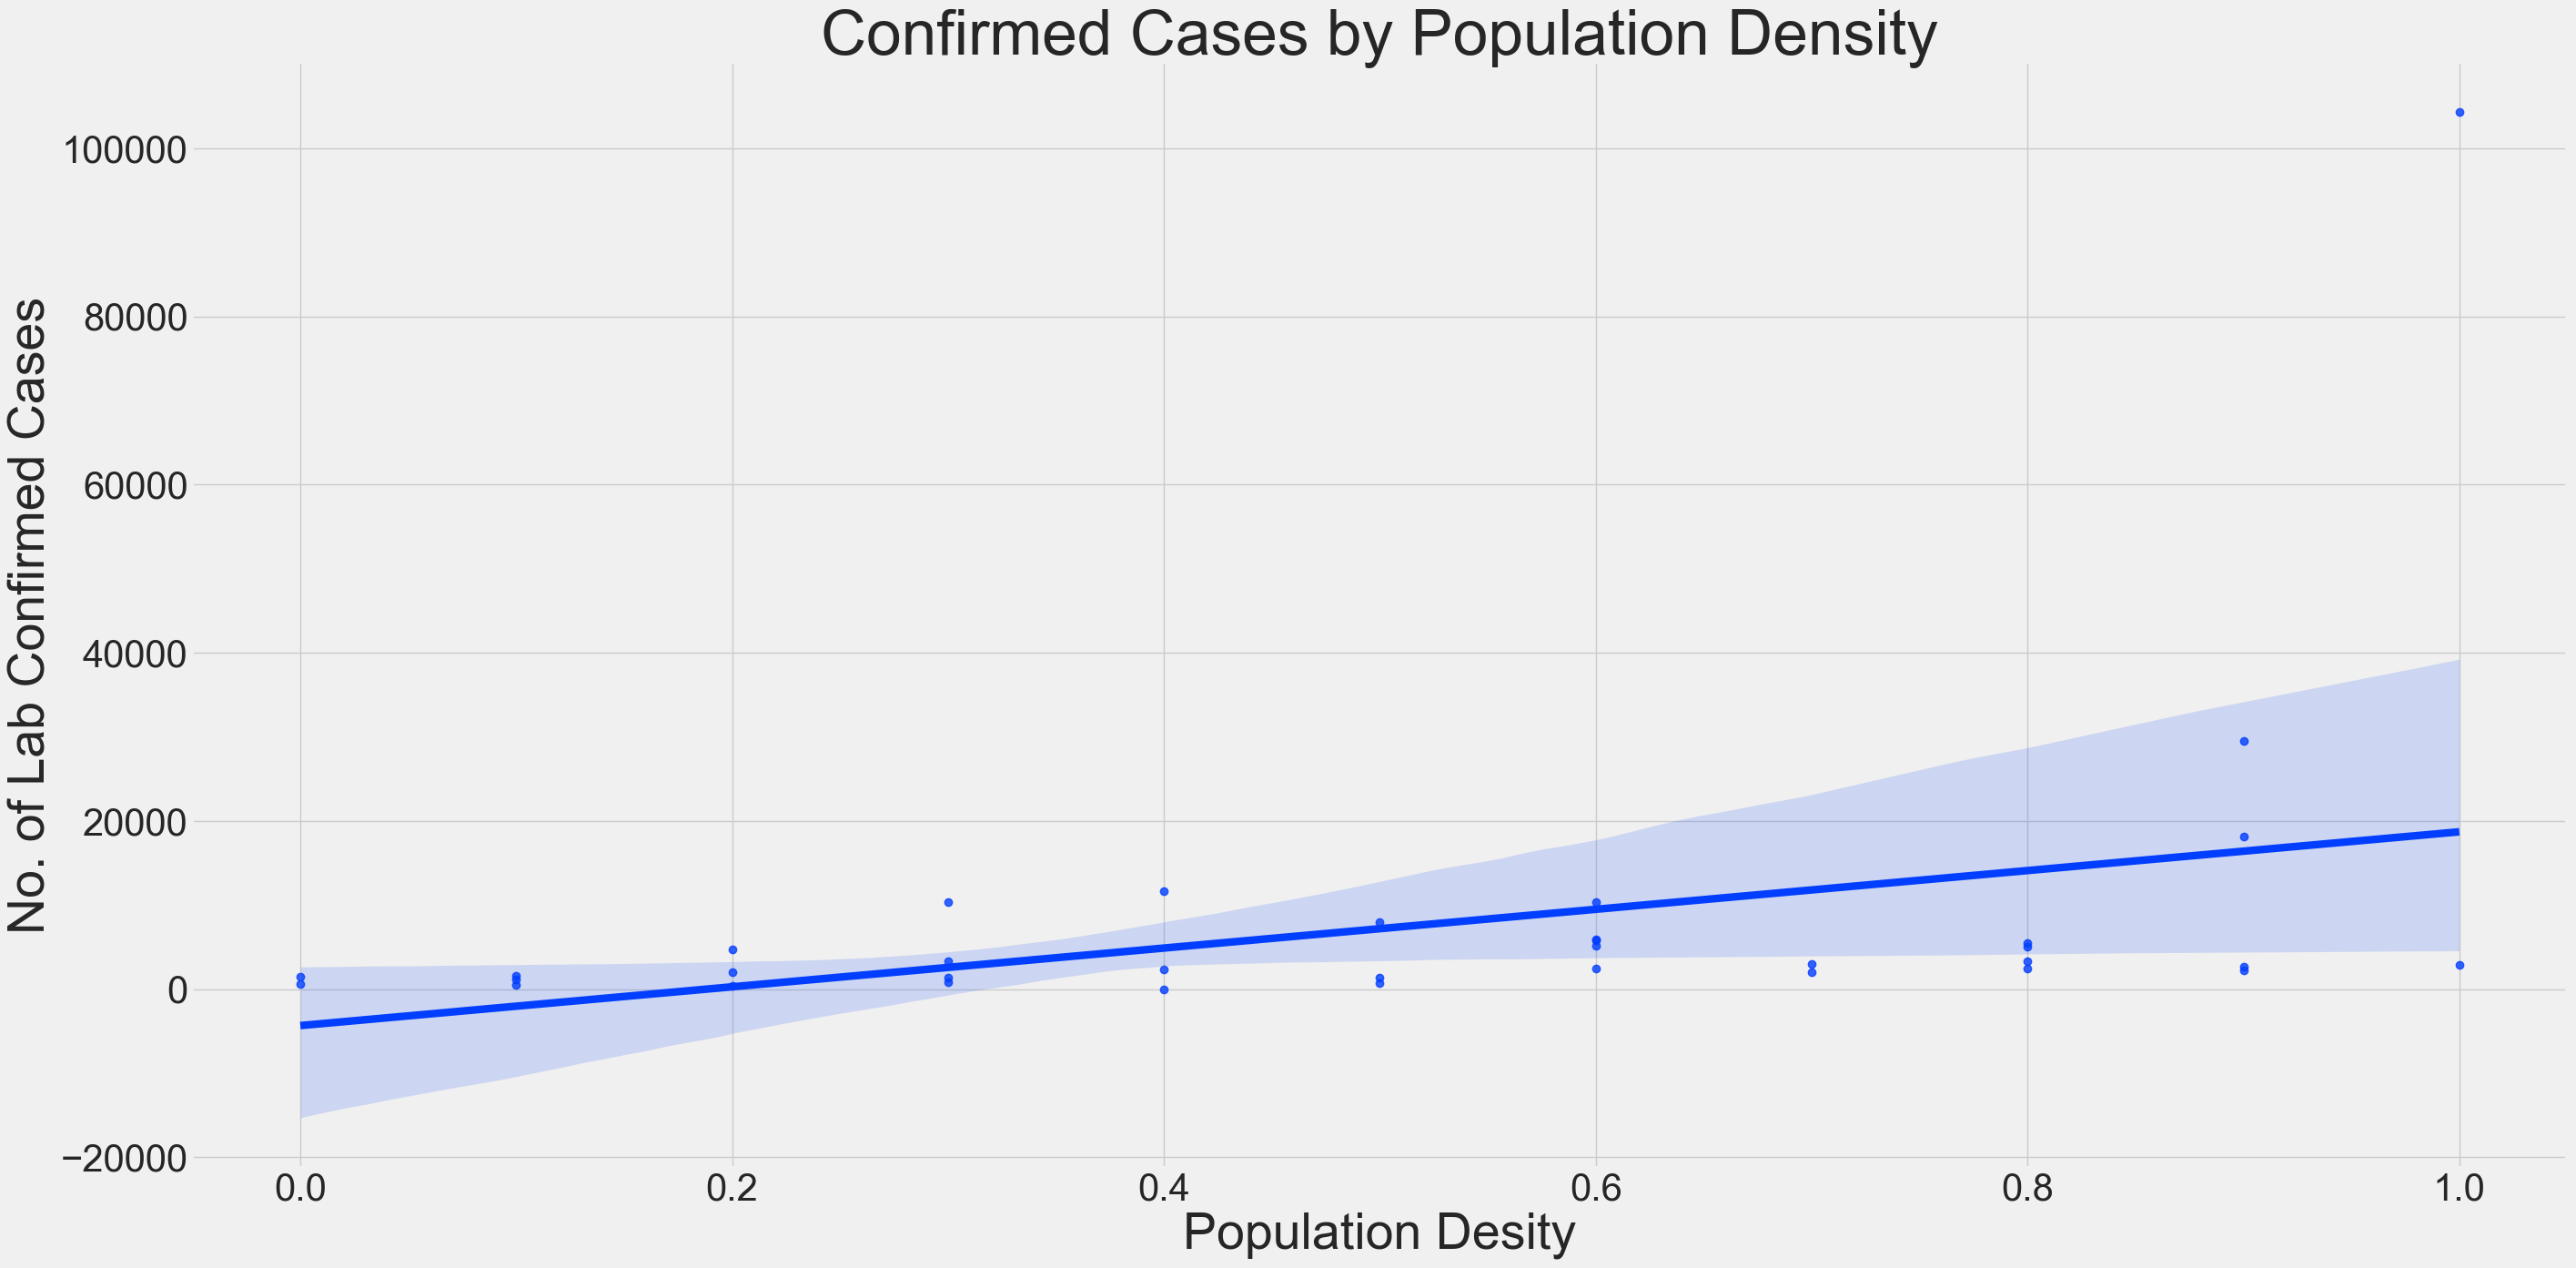

In [75]:
plt.figure(figsize=(30,15))
sns.regplot(data= Nig_states, x="Population Density", y="No. of cases (Lab confirmed)")
plt.title("Confirmed Cases by Population Density", fontsize=50)
plt.xlabel("Population Desity",fontsize=40)
plt.ylabel("No. of Lab Confirmed Cases",fontsize=40)
plt.tick_params(axis="both",labelsize=30)
plt.show()

#### Observation
##### There is generally an increase in the number of lab confirmed cases with an increase in population density.

### Todo J - Examining the Relationship Between the Number of Lab Confirmed Cases and Other Variables

#### Determining the Geopolitical Zones with the Highest Number of Covid-19 Cases

In [54]:
geo_zones = Nig_states.groupby("region", as_index=False).sum()
geo_zones.head()

region                            States Affected  \
0  North Central              FCTPlateauKwaraBenueNigerKogi   
1     North East          GombeBauchiBornoTarabaAdamawaYobe   
2     North West  KadunaKanoKatsinaSokotoJigawaKebbiZamfara   
3     South East               Akwa IbomEnuguAnambraImoAbia   
4    South South                RiversEdoDeltaEbonyiBayelsa   

   No. of cases (Lab confirmed) No. of cases (on admission)  No. Discharged  \
0                         48096                 94452881650           46943   
1                         10437                   825321344           10037   
2                         21868                   311002100           21518   
3                         15741                     6134630           15489   
4                         35335                   -30576282           34083   

   No. of Deaths  Population  Overall CCVI Index  Age  Epidemiological  \
0            435  30761000.0                 2.2  1.9              2.9   
1            215  29395000.0                 5.3  2.5              2.4   
2            324  54655000.0                 5.5  1.5              1.7   
3            184  27152000.0                 2.1  4.5              3.6   
4            649  24569000.0                 2.0  3.8              3.0   

   Fragility  Health System  Population Density  Socio-Economic  \
0        2.9            2.9                 2.3             3.1   
1        5.5            4.4                 0.9             4.6   
2        3.6            4.5                 2.9             6.1   
3        1.3            2.0                 4.3             1.5   
4        1.6            2.7                 3.2             1.5   

    Transport Availability  Acute IHR  
0                      3.1       5.27  
1                      4.9       5.24  
2                      5.3       6.11  
3                      0.3       5.49  
4                      2.1       5.17

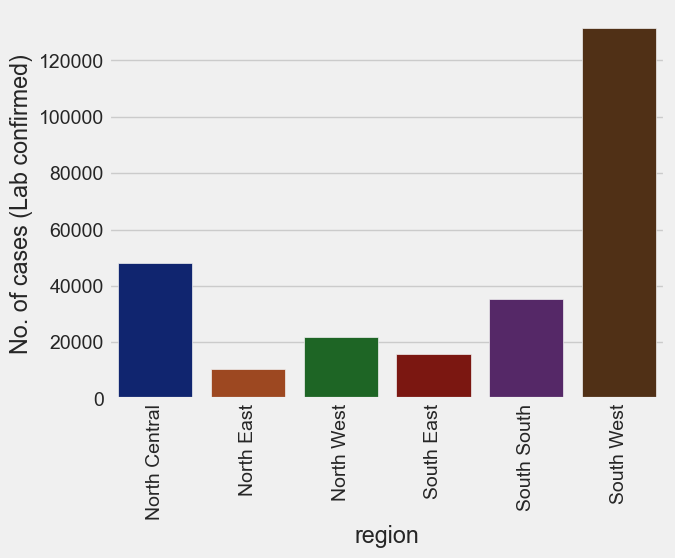

In [77]:
sns.set_palette("dark")
sns.barplot(x="region", y="No. of cases (Lab confirmed)",data= geo_zones)
plt.xticks(rotation=90)
plt.show()

### Observation
##### The top 3 geopolitical zones with the highest number of cases are the South West, North Central, and South South respectively.<br>The major contributor to the numbers in the South West is Lagos, while the major contributors in the North Central and South South are the FCT and Rivers State respectively

#### Determining the Relationship Between Transport Availability and the Number of Confirmed Cases

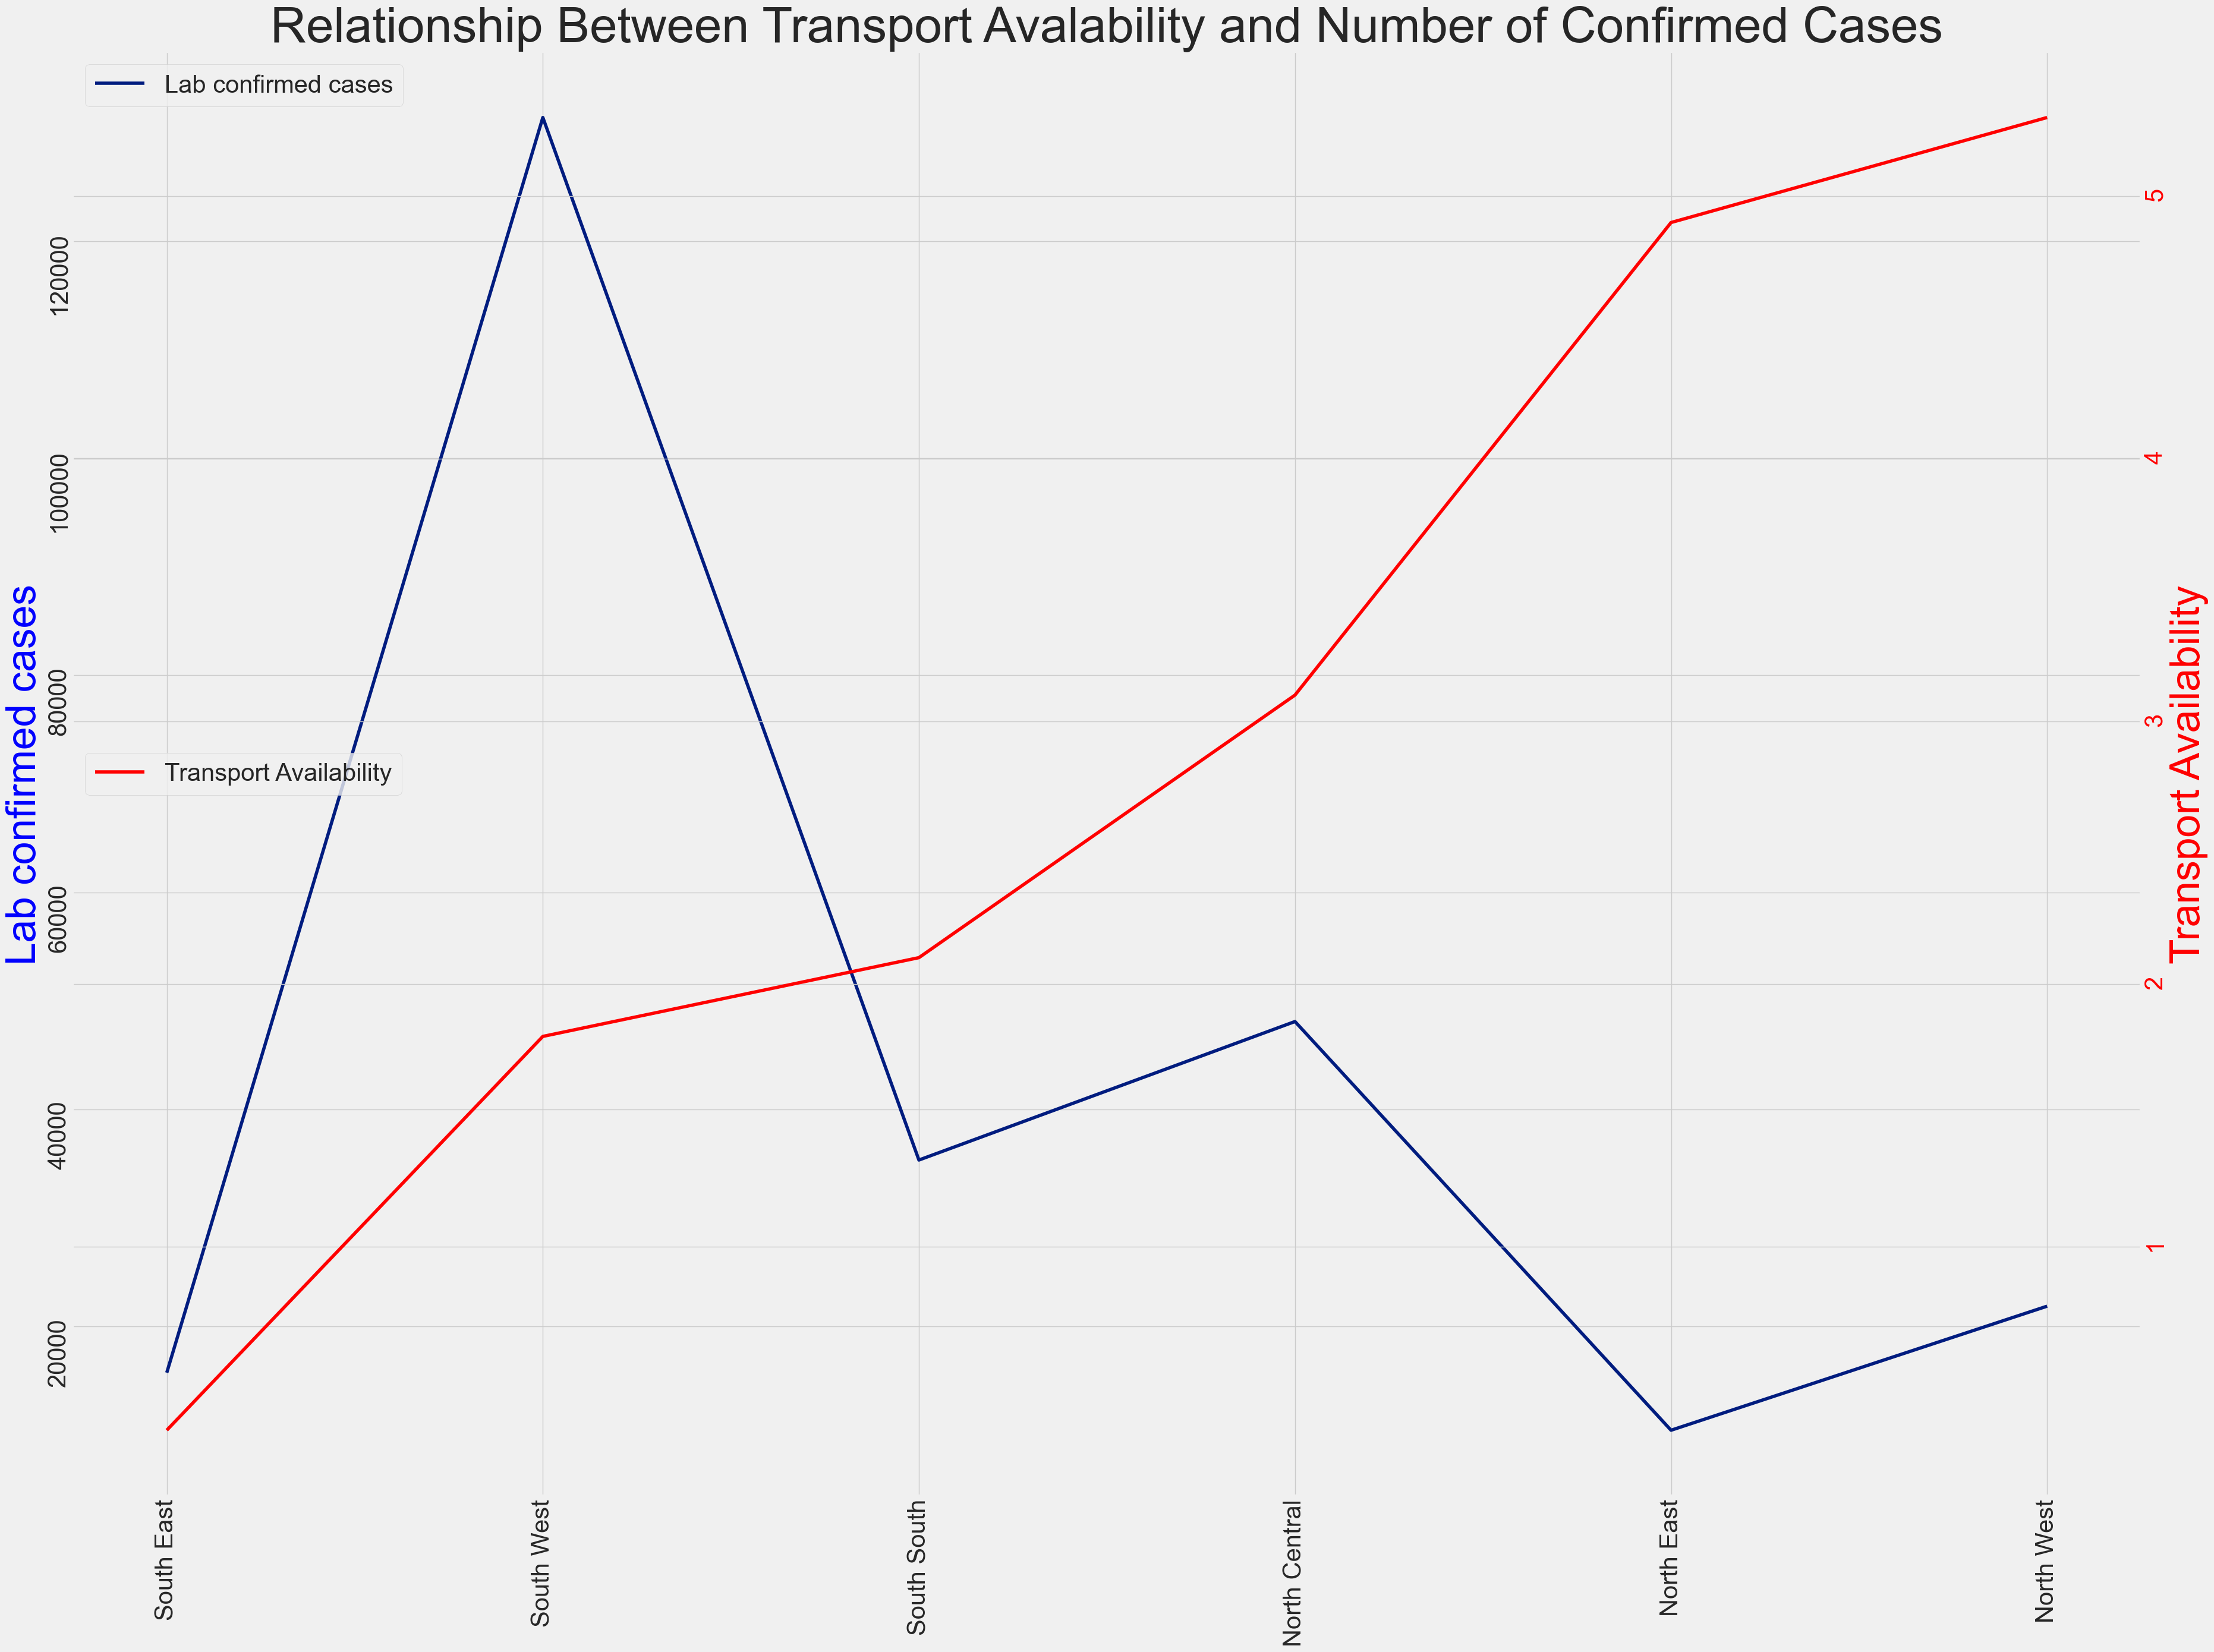

In [61]:
geo_transport = geo_zones.sort_values(" Transport Availability")
x = geo_transport["region"]
y = geo_transport["No. of cases (Lab confirmed)"]
z = geo_transport[" Transport Availability"]
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, label="Lab confirmed cases")
ax1.set_ylabel('Lab confirmed cases',color= "b", fontsize=50)
ax2 = ax1.twinx()
ax2.plot(x, z, 'r-', label="Transport Availability")
ax2.set_ylabel('Transport Availability', color='r',fontsize=50)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.legend(loc=2, prop={'size': 30})
ax2.legend(loc=6, prop={'size': 30})
ax1.tick_params(axis='x', labelrotation = 90, labelsize=30)
ax1.tick_params(axis='y', labelrotation = 90, labelsize=30)
ax2.tick_params(axis='y', labelrotation = 90, labelsize=30)
plt.title("Relationship Between Transport Avalability and Number of Confirmed Cases", fontsize=60)
plt.show()

### Observation
##### Transport availability is highest in the North West.<br>However, the presence of a good transport network has no direct relationship with the spread of Covid-19 in the geo-political zones.

#### Determining the Relationship Between the Health System Index and the Number of Discharged Cases

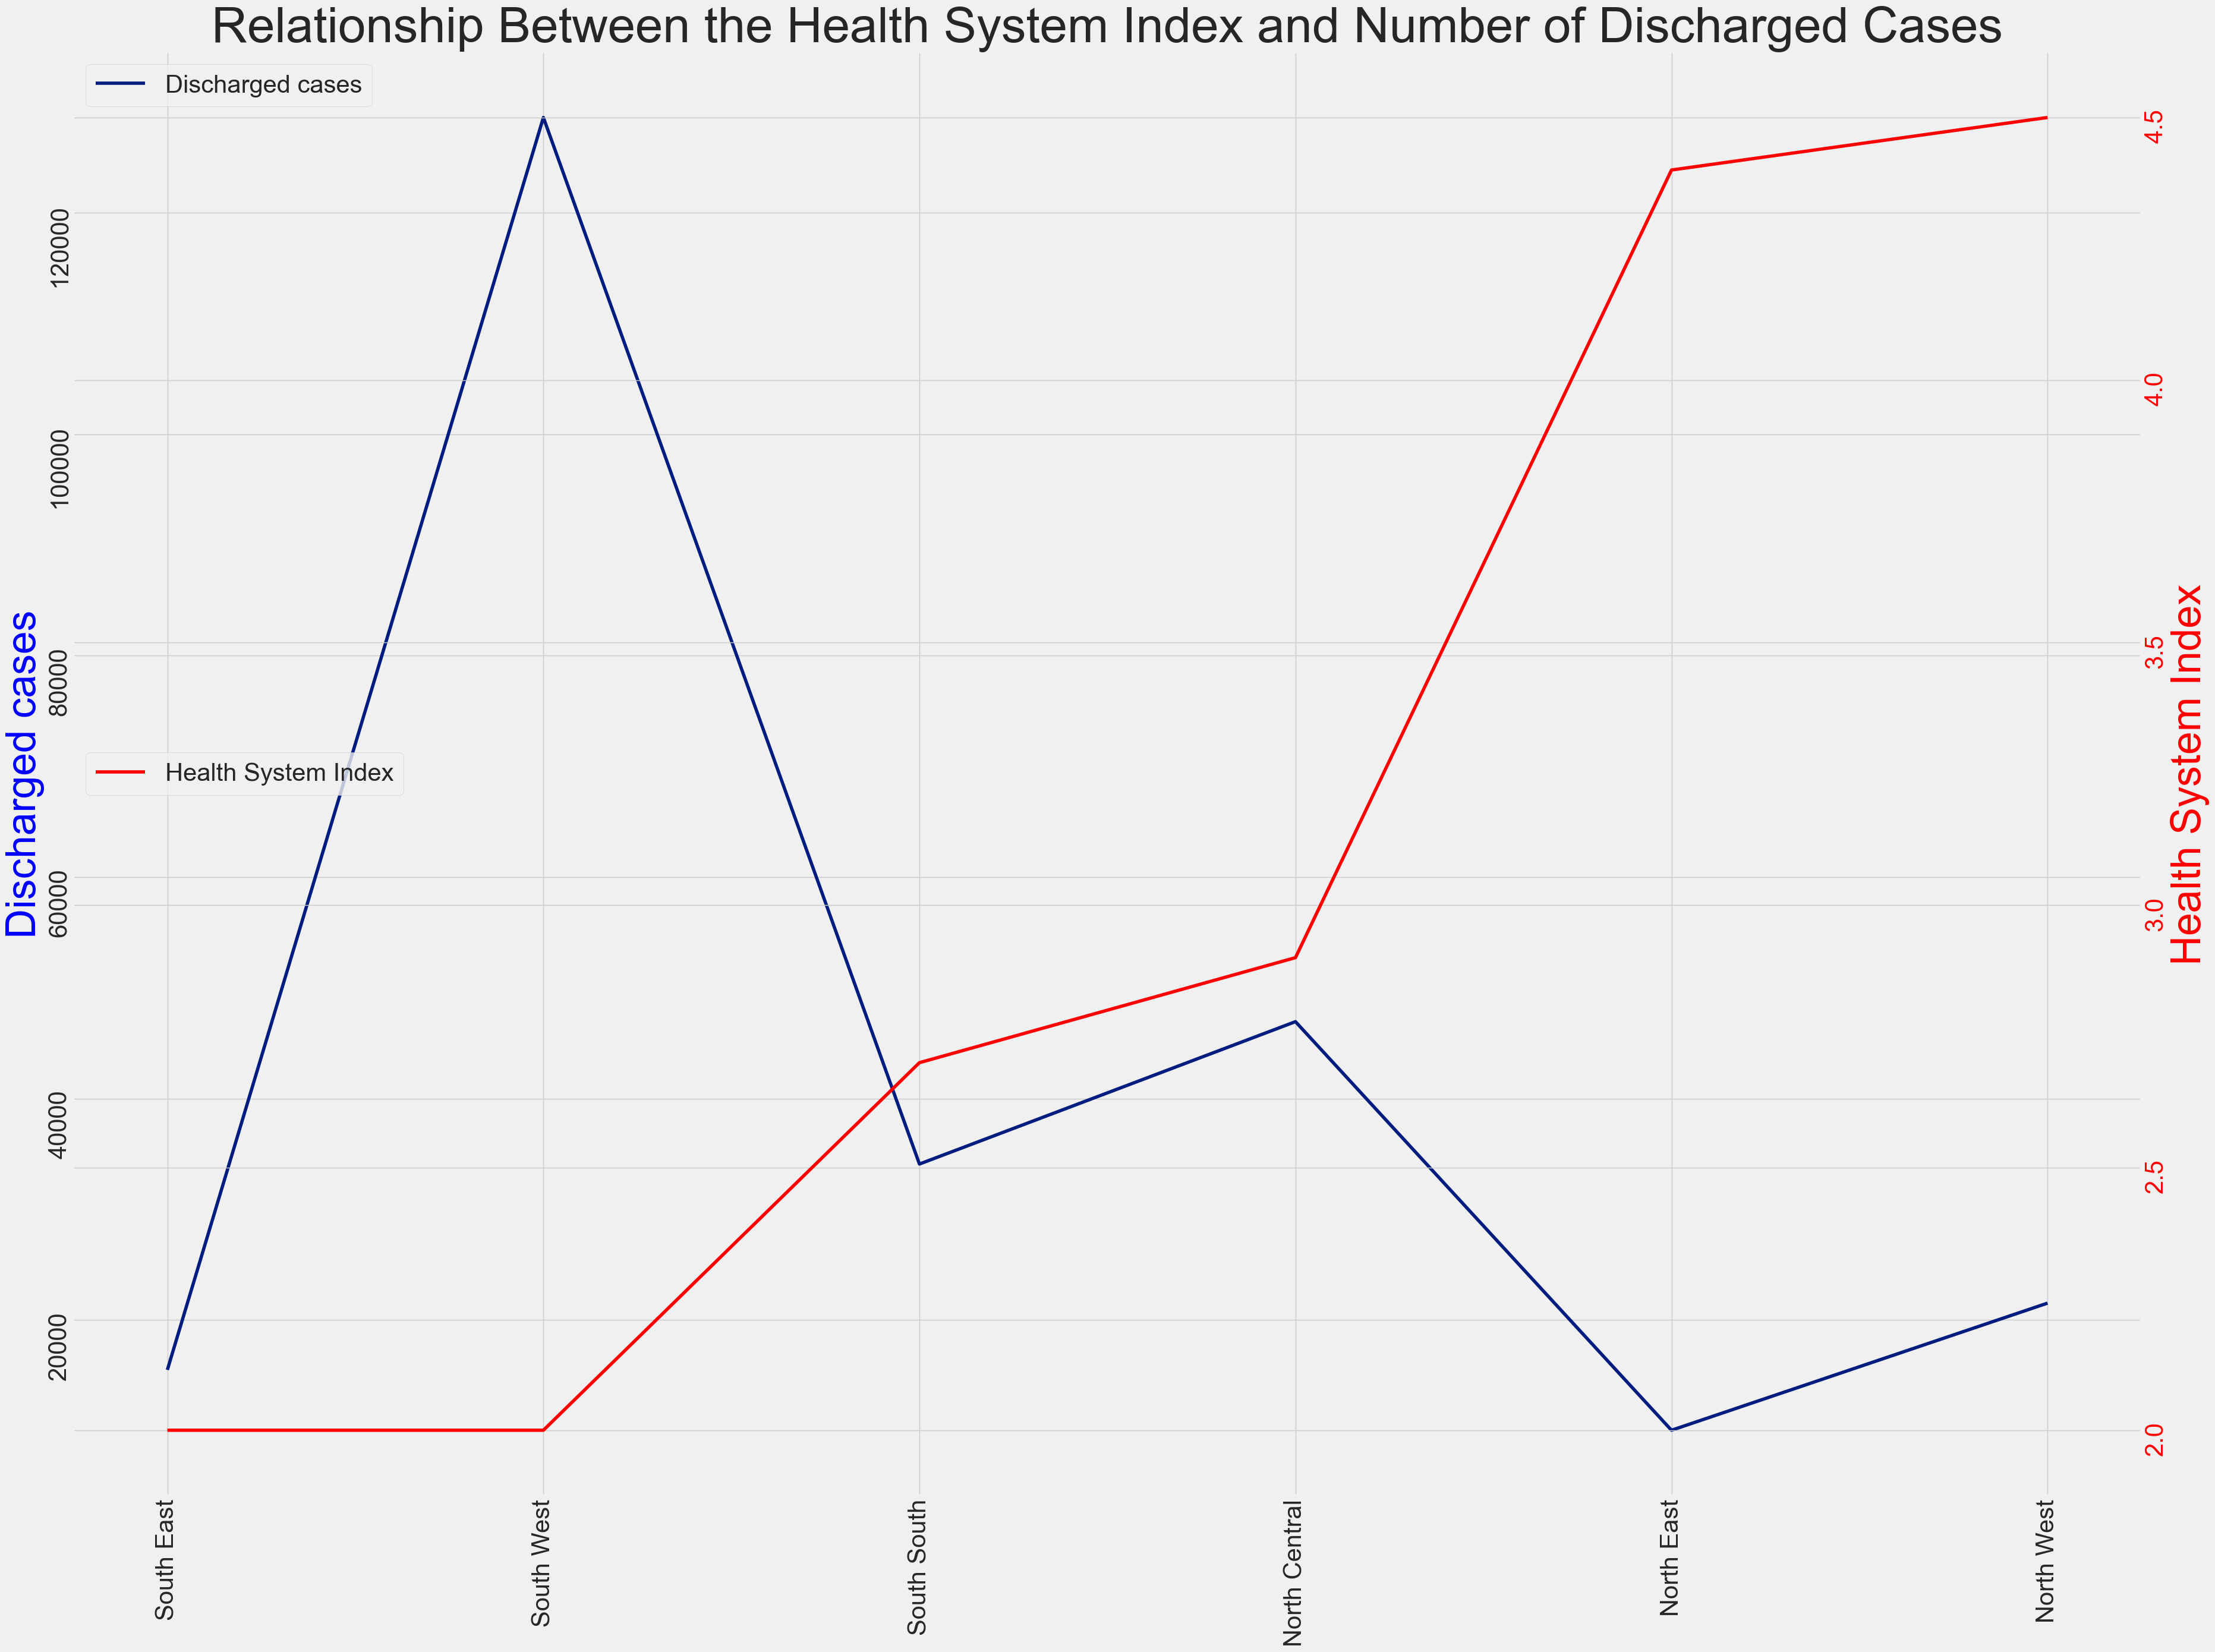

In [62]:
geo_health = geo_zones.sort_values("Health System")
x = geo_health["region"]
y = geo_health["No. Discharged"]
z = geo_health["Health System"]
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, label="Discharged cases")
ax1.set_ylabel('Discharged cases',color= "b", fontsize=50)
ax2 = ax1.twinx()
ax2.plot(x, z, 'r-', label="Health System Index")
ax2.set_ylabel('Health System Index', color='r',fontsize=50)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.legend(loc=2, prop={'size': 30})
ax2.legend(loc=6, prop={'size': 30})
ax1.tick_params(axis='x', labelrotation = 90, labelsize=30)
ax1.tick_params(axis='y', labelrotation = 90, labelsize=30)
ax2.tick_params(axis='y', labelrotation = 90, labelsize=30)
plt.title("Relationship Between the Health System Index and Number of Discharged Cases", fontsize=60)
plt.show()

### Observation
##### The North West has the highest cumulative health system index.<br>There is no direct relationship between the health system index and the number of patients who survived Covid-19.

#### Determining the Relationship Between the Health System Index and the Number of Deaths

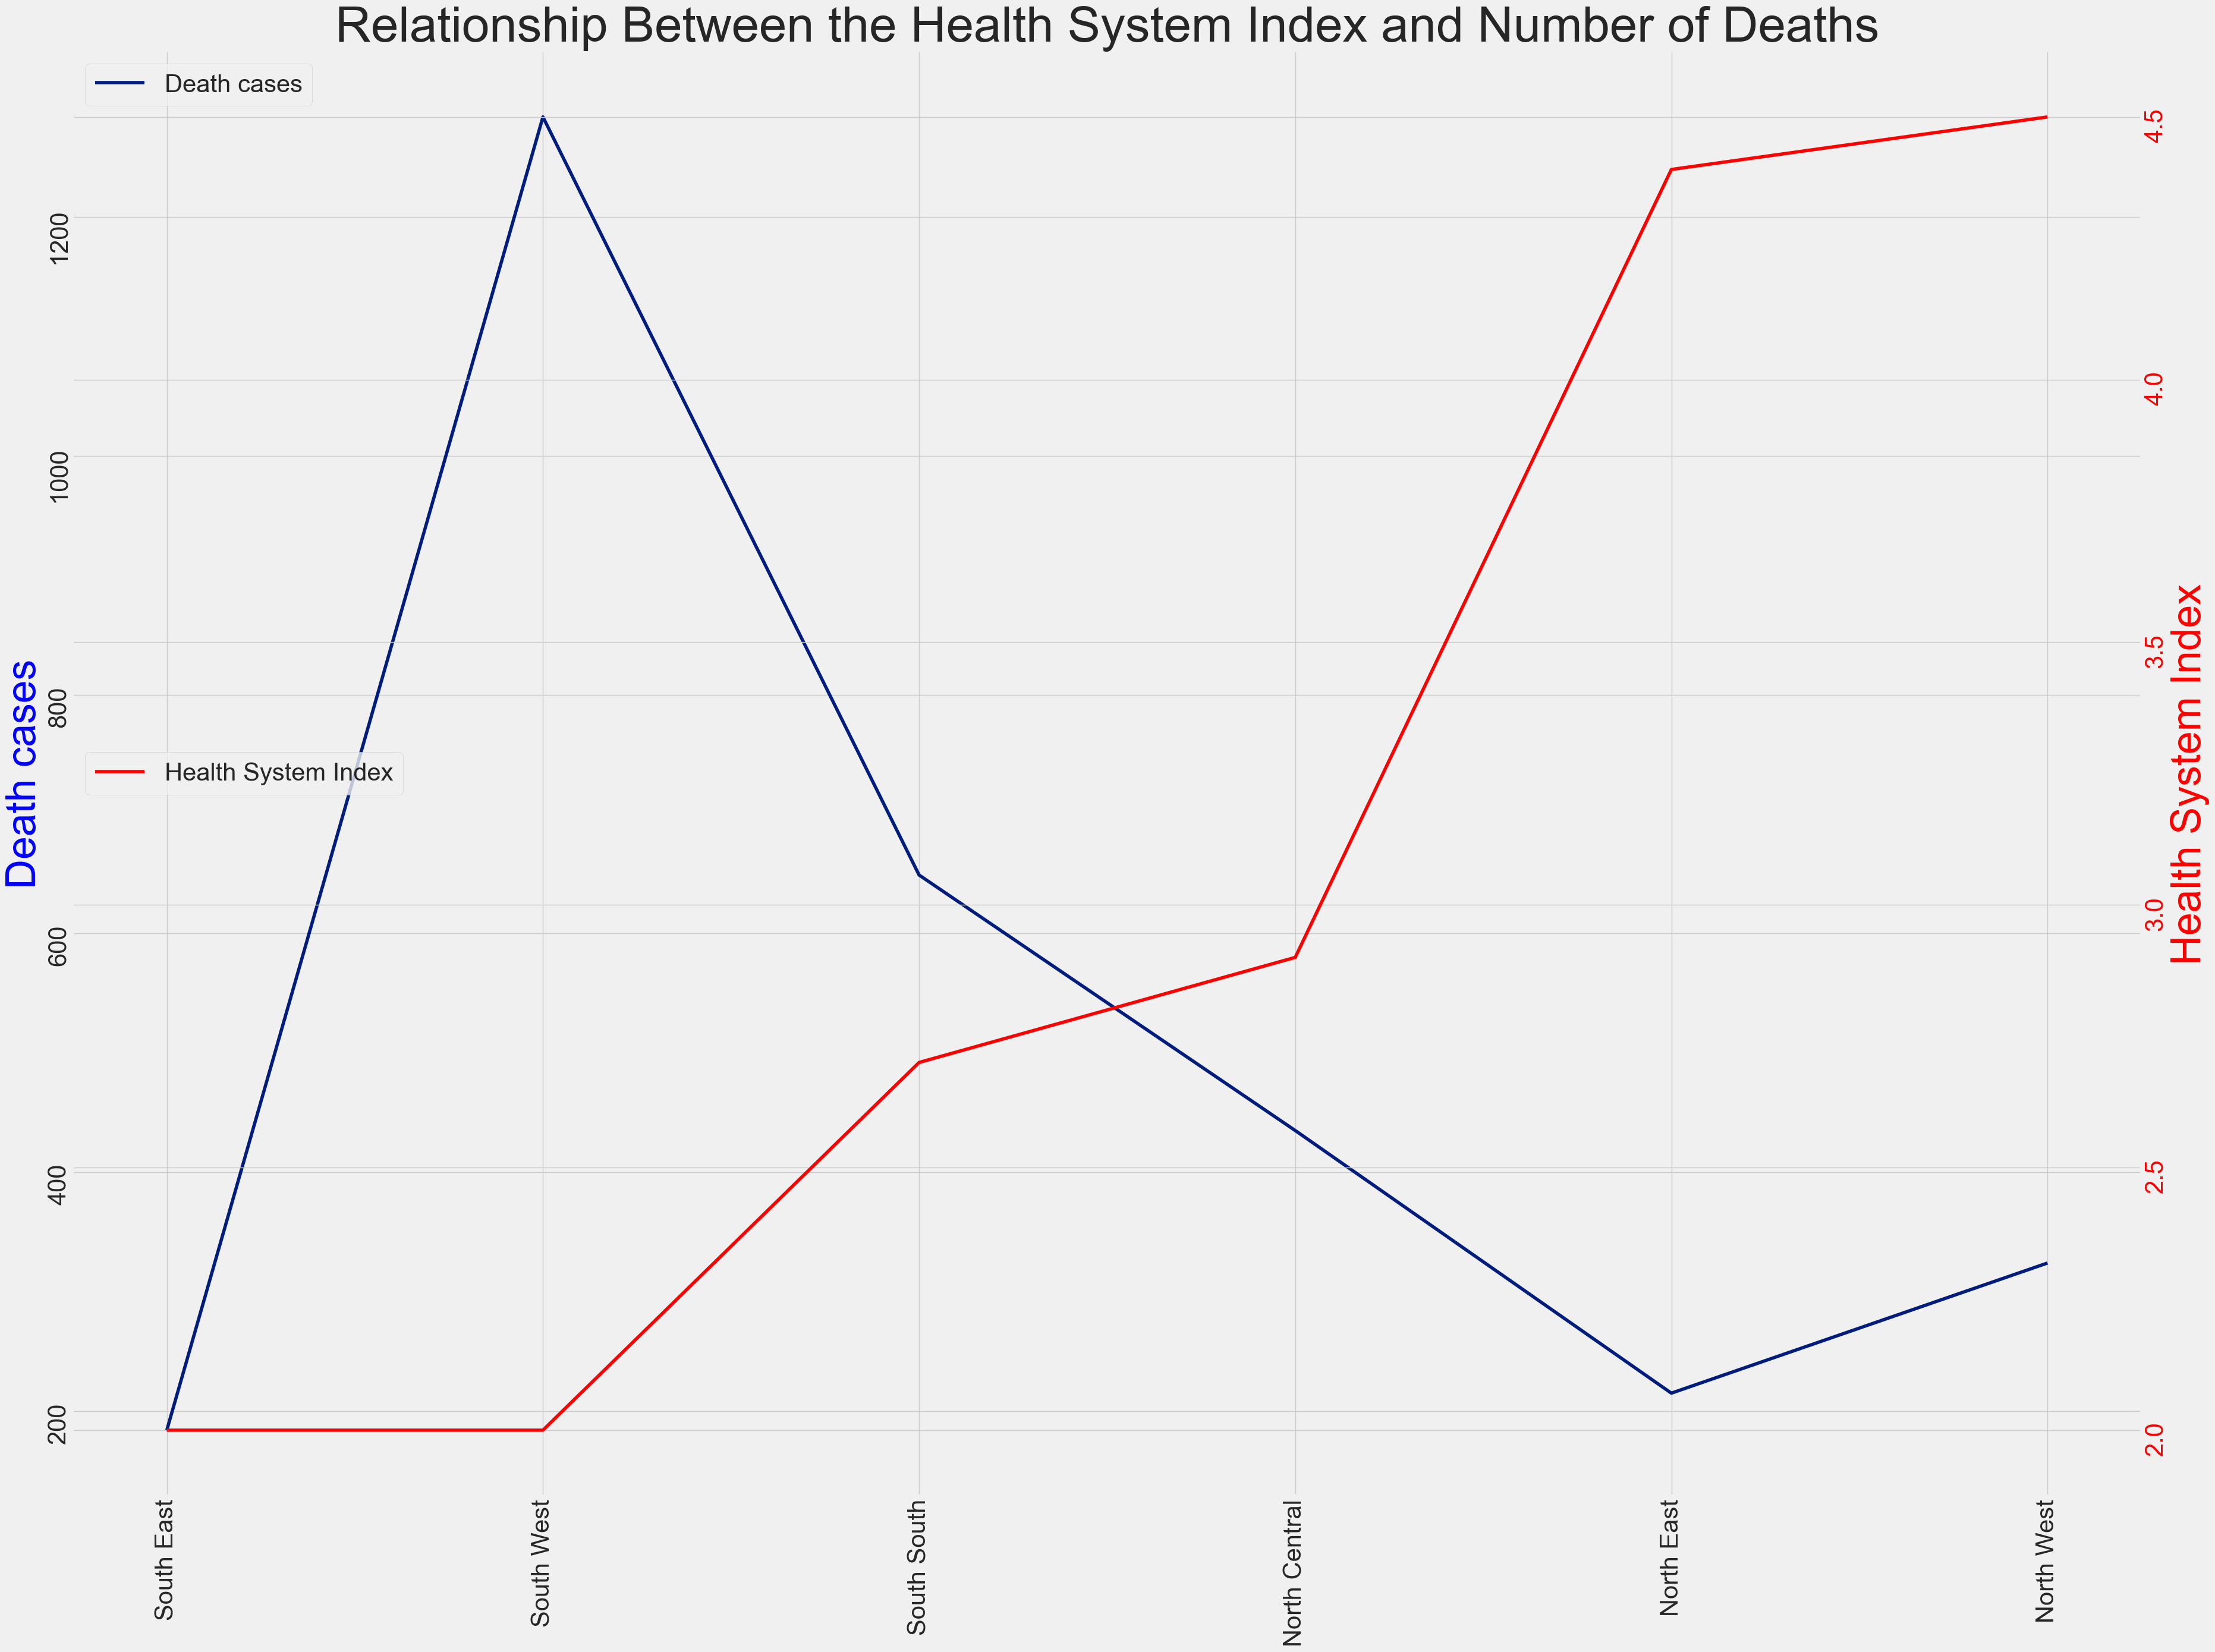

In [63]:
geo_health = geo_zones.sort_values("Health System")
x = geo_health["region"]
y = geo_health["No. of Deaths"]
z = geo_health["Health System"]
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, label="Death cases")
ax1.set_ylabel('Death cases',color= "b", fontsize=50)
ax2 = ax1.twinx()
ax2.plot(x, z, 'r-', label="Health System Index")
ax2.set_ylabel('Health System Index', color='r',fontsize=50)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.legend(loc=2, prop={'size': 30})
ax2.legend(loc=6, prop={'size': 30})
ax1.tick_params(axis='x', labelrotation = 90, labelsize=30)
ax1.tick_params(axis='y', labelrotation = 90, labelsize=30)
ax2.tick_params(axis='y', labelrotation = 90, labelsize=30)
plt.title("Relationship Between the Health System Index and Number of Deaths", fontsize=60)
plt.show()

### Observation
##### There is also no direct relationship between the health system index and the number of patients who died of Covid-19

#### Determining the Relationship Between the Socioeconomic Index and the Number of Confirmed Cases

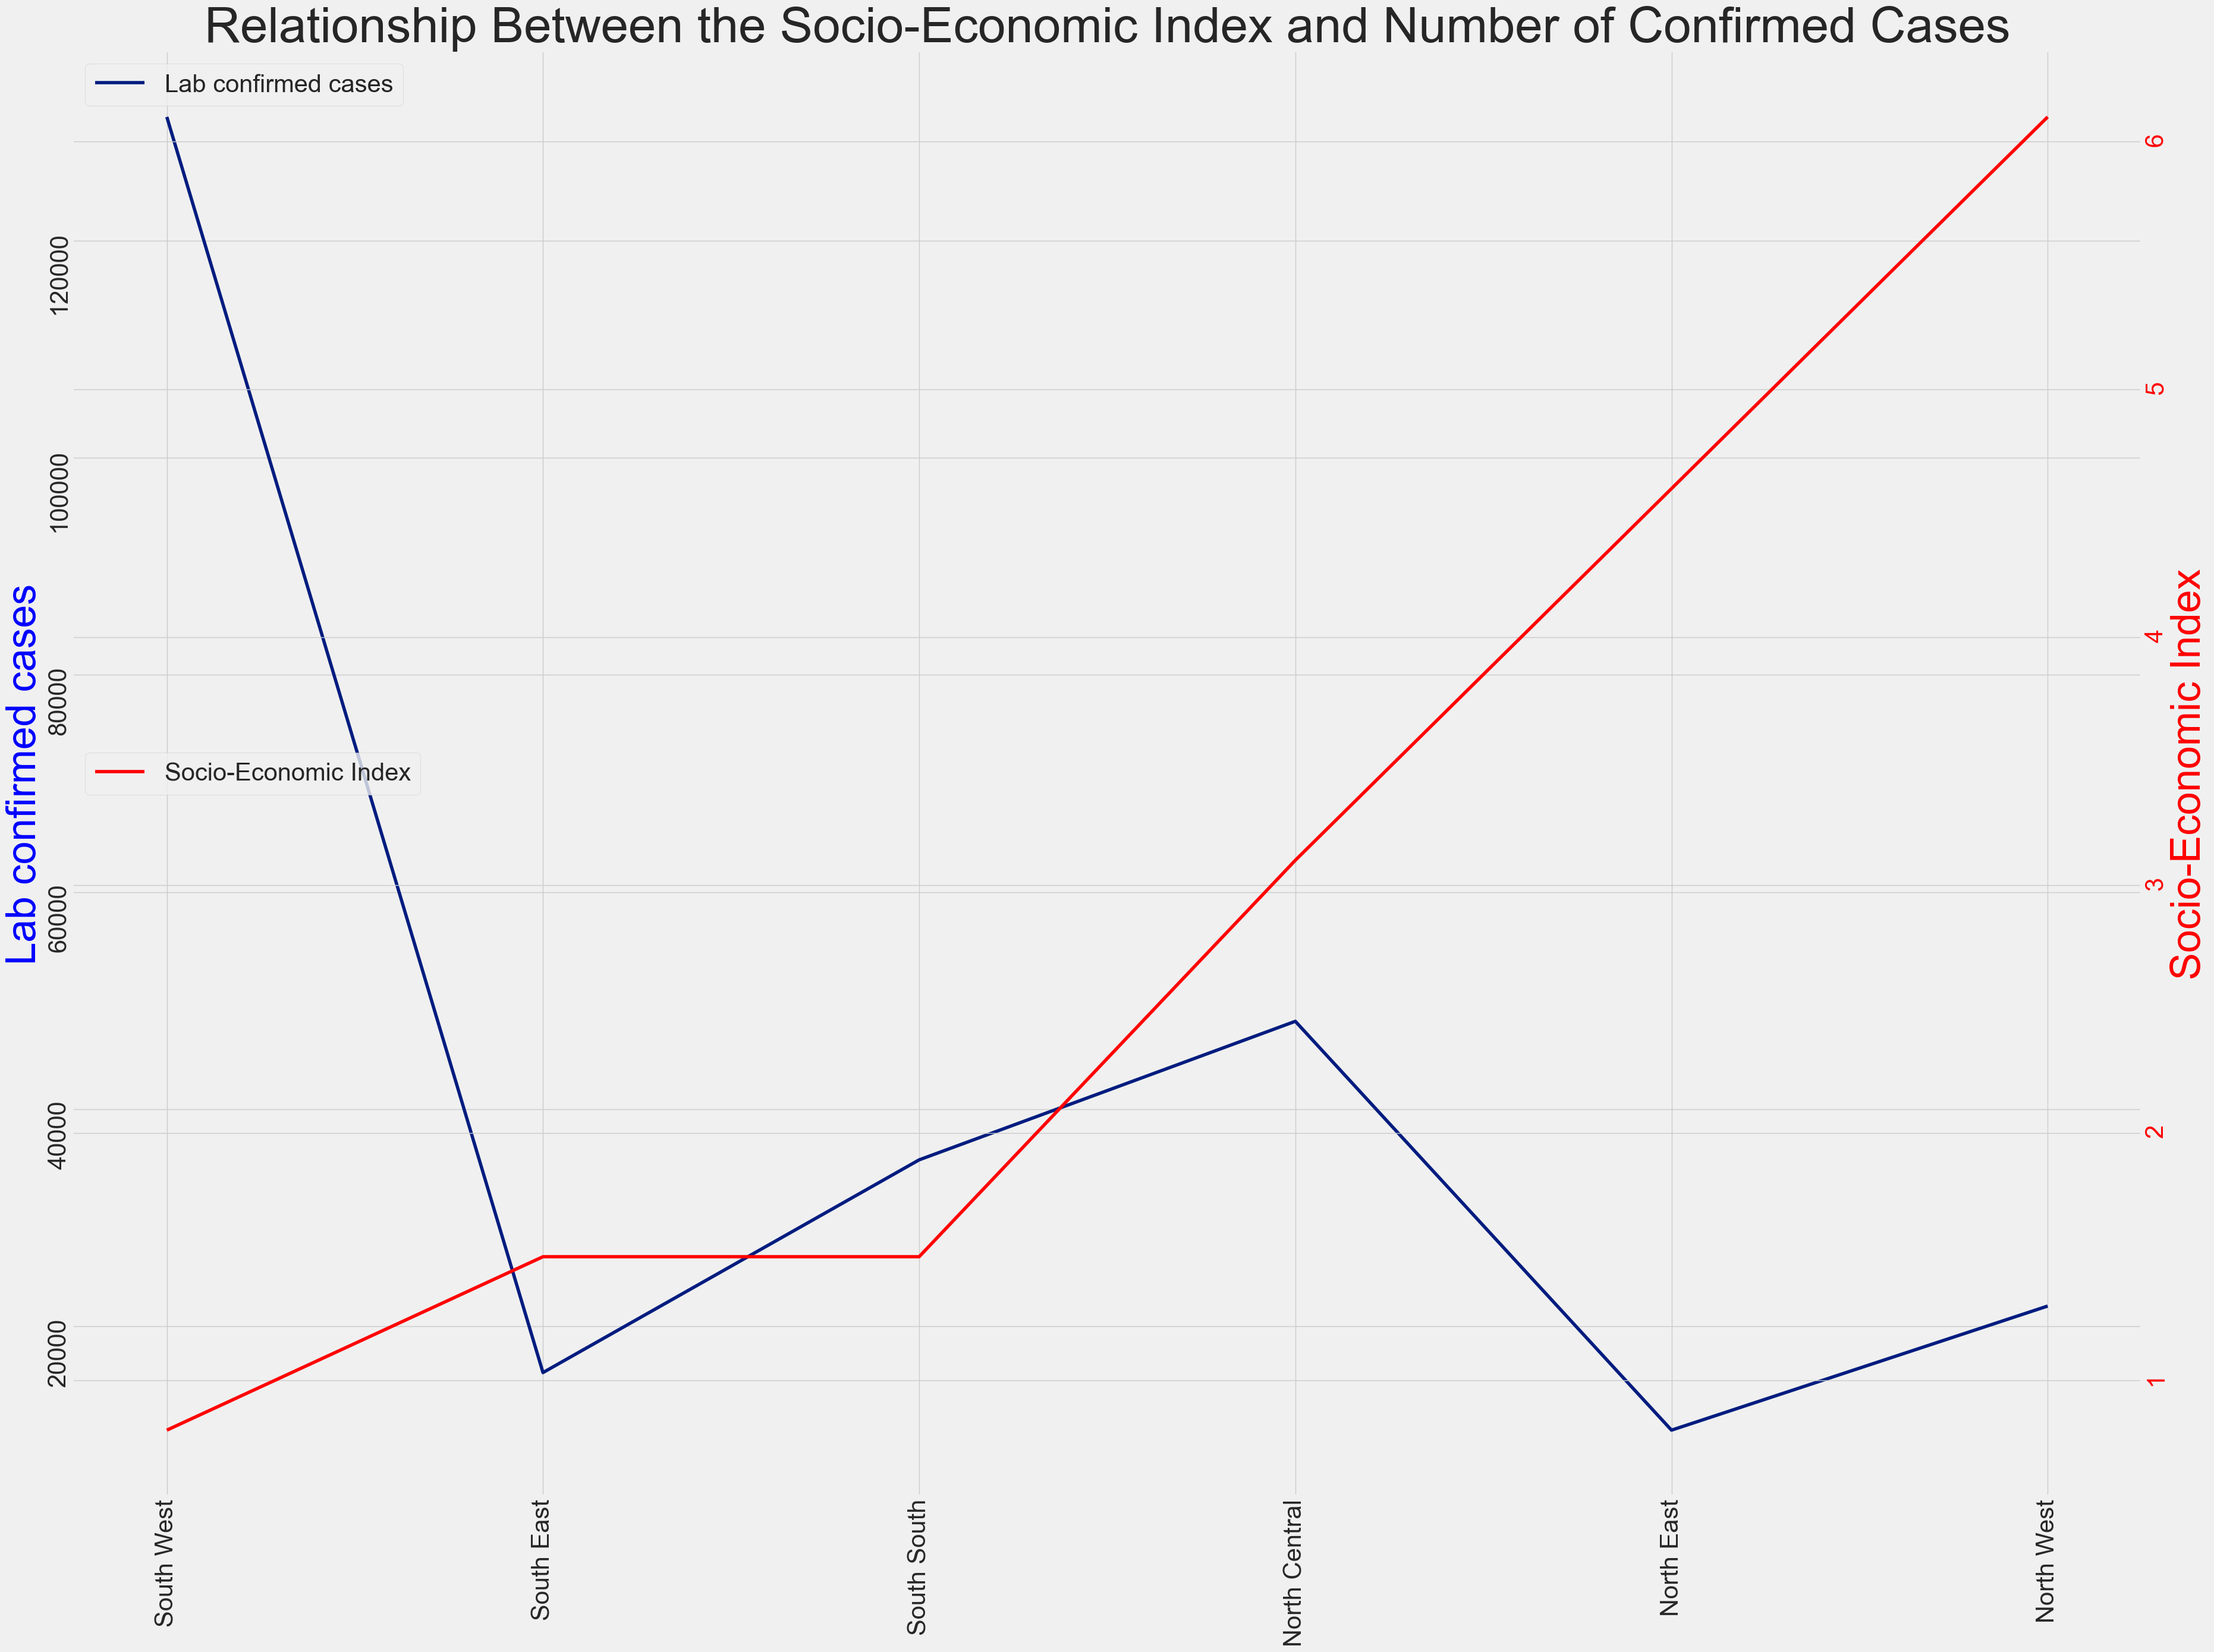

In [64]:
geo_socioeconomic = geo_zones.sort_values("Socio-Economic")
x = geo_socioeconomic["region"]
y = geo_socioeconomic["No. of cases (Lab confirmed)"]
z = geo_socioeconomic["Socio-Economic"]
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, label="Lab confirmed cases")
ax1.set_ylabel('Lab confirmed cases',color= "b", fontsize=50)
ax2 = ax1.twinx()
ax2.plot(x, z, 'r-', label="Socio-Economic Index")
ax2.set_ylabel('Socio-Economic Index', color='r',fontsize=50)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.legend(loc=2, prop={'size': 30})
ax2.legend(loc=6, prop={'size': 30})
ax1.tick_params(axis='x', labelrotation = 90, labelsize=30)
ax1.tick_params(axis='y', labelrotation = 90, labelsize=30)
ax2.tick_params(axis='y', labelrotation = 90, labelsize=30)
plt.title("Relationship Between the Socio-Economic Index and Number of Confirmed Cases", fontsize=60)
plt.show()

### Observation
##### The North West has the highest cumulative socio-economic index.<br>There is however, no direct relationship between the socio-economic index and the number of confirmed Covid-19 cases

#### Determining the Relationship Between the Fragility Index and the Number of Confirmed Cases

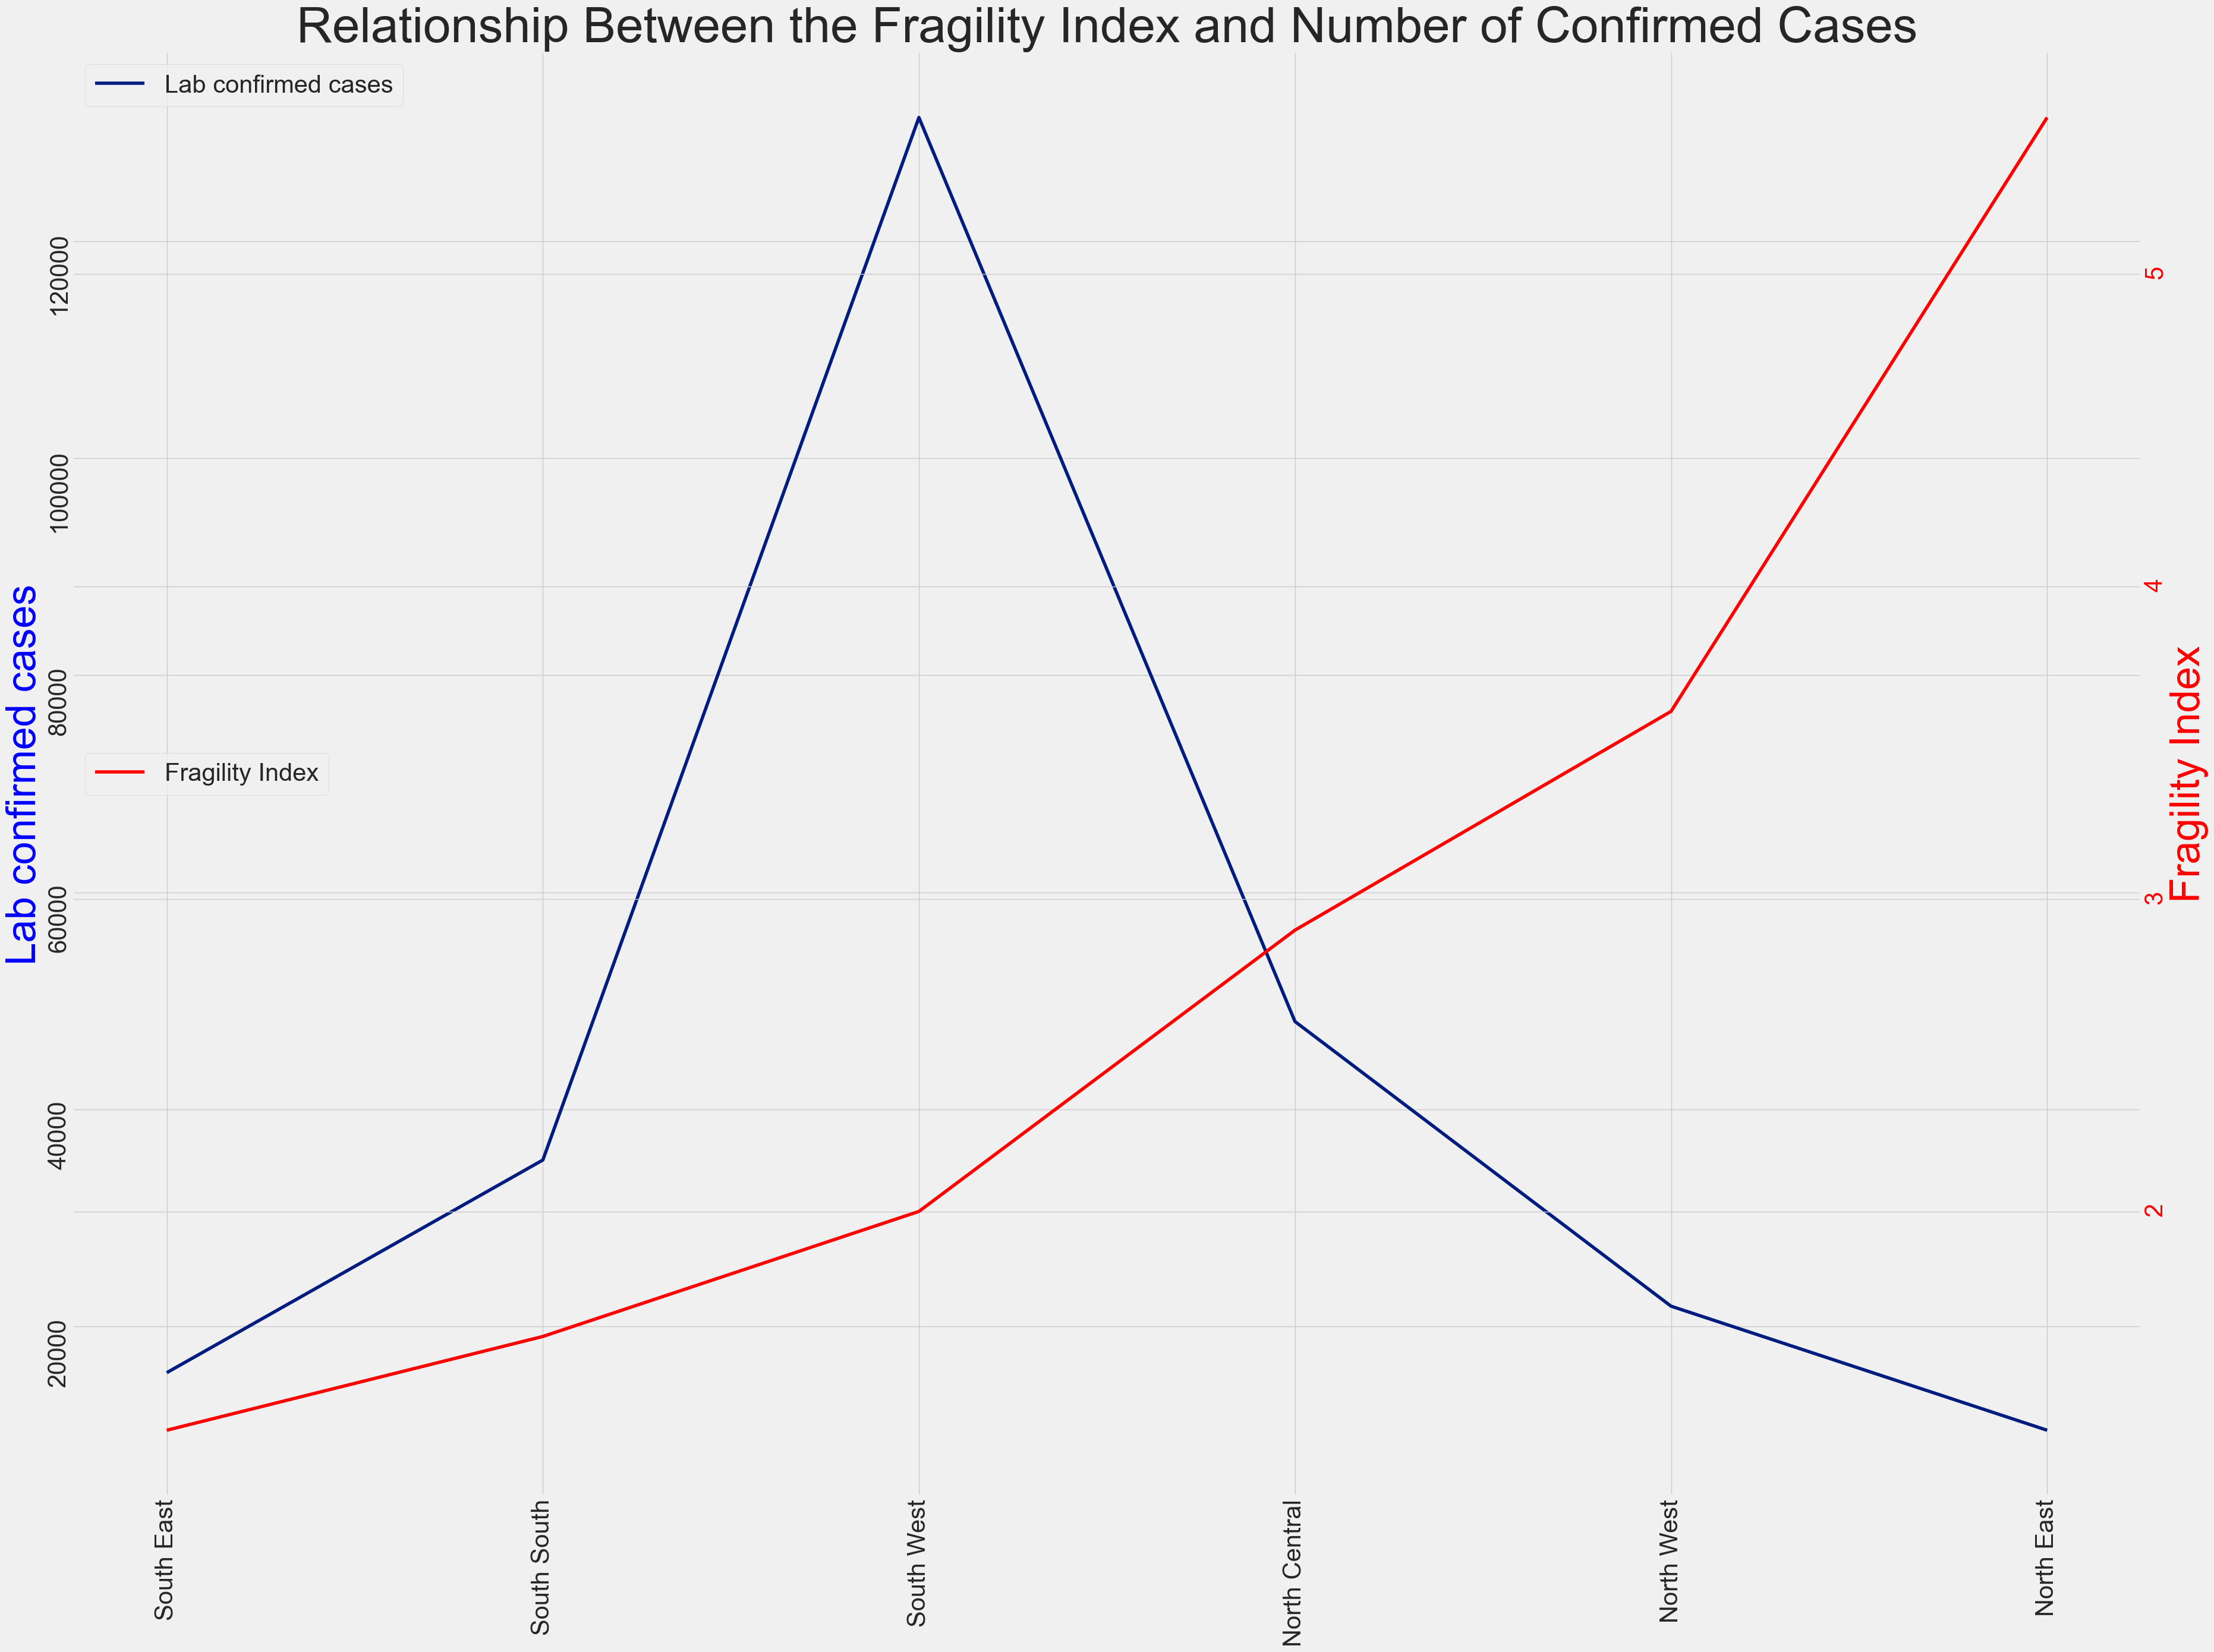

In [65]:
geo_fragility = geo_zones.sort_values("Fragility")
x = geo_fragility["region"]
y = geo_fragility["No. of cases (Lab confirmed)"]
z = geo_fragility["Fragility"]
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, label="Lab confirmed cases")
ax1.set_ylabel('Lab confirmed cases',color= "b", fontsize=50)
ax2 = ax1.twinx()
ax2.plot(x, z, 'r-', label="Fragility Index")
ax2.set_ylabel('Fragility Index', color='r',fontsize=50)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.legend(loc=2, prop={'size': 30})
ax2.legend(loc=6, prop={'size': 30})
ax1.tick_params(axis='x', labelrotation = 90, labelsize=30)
ax1.tick_params(axis='y', labelrotation = 90, labelsize=30)
ax2.tick_params(axis='y', labelrotation = 90, labelsize=30)
plt.title("Relationship Between the Fragility Index and Number of Confirmed Cases", fontsize=60)
plt.show()

### Observation
##### The North East has the highest total fragility index, but there is no direct relationship between the fragility index of a region and the number of Covid-19 confirmed cases.

### Todo L - Visualization of the Effect of Covid-19 on the Nigerian Economy

In [70]:
df7.head()

Year           Q1           Q2           Q3           Q4
0  2014  15438679.50  16084622.31  17479127.58  18150356.45
1  2015  16050601.38  16463341.91  17976234.59  18533752.07
2  2016  15943714.54  16218542.41  17555441.69  18213537.29
3  2017  15797965.83  16334719.27  17760228.17  18598067.07
4  2018  16096654.19  16580508.07  18081342.10  19041437.59

In [71]:
melted_df7 = df7.melt(id_vars="Year", var_name="Quarter", value_name="GDP")
melted_df7.head()

Year Quarter          GDP
0  2014      Q1  15438679.50
1  2015      Q1  16050601.38
2  2016      Q1  15943714.54
3  2017      Q1  15797965.83
4  2018      Q1  16096654.19

In [72]:
Q2_2020 = melted_df7[(melted_df7["Year"] == 2020) & (melted_df7["Quarter"]== "Q2")]
Q2_2020_GDP = Q2_2020["GDP"]
print(Q2_2020_GDP)

13    15890000.0
Name: GDP, dtype: float64


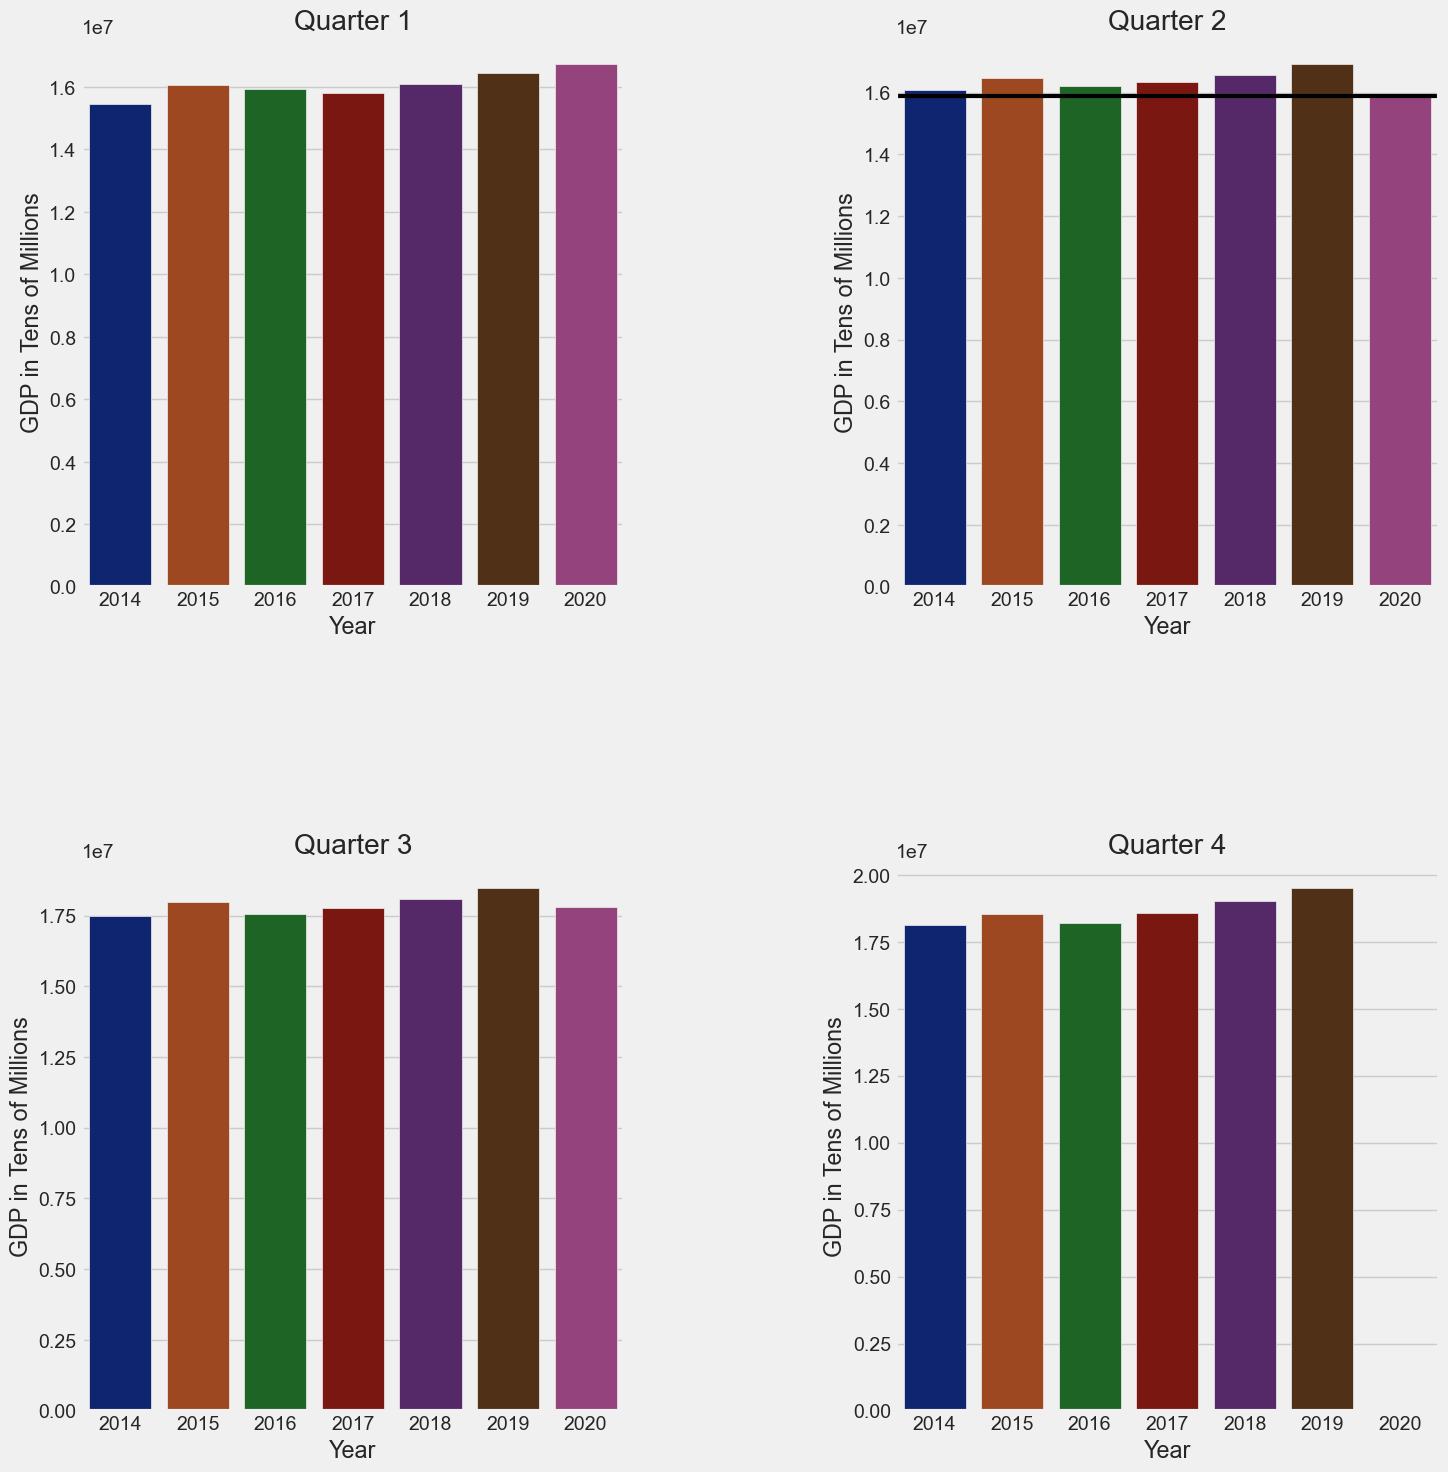

In [79]:
fig,ax = plt.subplots(2,2,sharey= False, figsize=(15,15))
fig.tight_layout(pad=3.0)
fig.tight_layout(pad=2.5)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
Quarter1 = melted_df7[melted_df7["Quarter"]=="Q1"]
Quarter2 = melted_df7[melted_df7["Quarter"]=="Q2"]
Quarter3 = melted_df7[melted_df7["Quarter"]=="Q3"]
Quarter4 = melted_df7[melted_df7["Quarter"]=="Q4"]
sns.barplot(data=Quarter1, x="Year", y="GDP",ax=ax[0,0], ci =None)
sns.barplot(data=Quarter2, x="Year", y="GDP", 
            ax=ax[0,1], ci =None).axhline(y=15890000.0, linewidth=3, color="black")
sns.barplot(data=Quarter3, x="Year", y="GDP", ax=ax[1,0], ci =None)
sns.barplot(data=Quarter4, x="Year", y="GDP", ax=ax[1,1], ci =None)
ax[0][0].set_title("Quarter 1")
ax[0][1].set_title("Quarter 2")
ax[1][0].set_title("Quarter 3")
ax[1][1].set_title("Quarter 4")
ax[1][1].set_ylabel("GDP in Tens of Millions")
for i in ax.flat:
    i.set(xlabel="Year", ylabel="GDP in Tens of Millions")
plt.show()

### Observation
##### Nigeria's GDP experienced a notable increase in the first quarter of 2020 compared to previous years. However, following the arrival of Covid-19 into the country in February, the economy experienced a decline in the second quarter of 2020.<br>This decline is evident in the Q2 GDP value being at its lowest in 2020 compared to previous years (2014 to 2019).